# Bitcoin analytics
https://bitcoin.org/

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
bitcoindata = pd.read_csv("bitcoin_prices.csv")
bitcoindata

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-09-30,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-01,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-02,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-03,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-04,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2826,BTC,2021-06-26,31739.290211,31599.061431,32706.070569,30190.733553
2827,BTC,2021-06-27,34213.012738,32290.253772,34313.410224,32006.611849
2828,BTC,2021-06-28,34365.185783,34698.863389,35188.436188,33911.951437
2829,BTC,2021-06-29,35945.786857,34488.518245,36609.362895,34240.012468


We need to add more columns to the dataframe before we answer questions, so what columns do we already have?

In [3]:
bitcoindata.columns

Index(['Currency', 'Date', 'Closing Price (USD)', '24h Open (USD)',
       '24h High (USD)', '24h Low (USD)'],
      dtype='object')

We need to add three more columns: <b>Yearly</b>, <b>Monthly</b>, and <b>Quarterly</b>.

In [4]:
bitcoindata['Yearly'] = bitcoindata['Date'].str[0:4]
bitcoindata

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Yearly
0,BTC,2013-09-30,123.654990,124.304660,124.751660,122.563490,2013
1,BTC,2013-10-01,125.455000,123.654990,125.758500,123.633830,2013
2,BTC,2013-10-02,108.584830,125.455000,125.665660,83.328330,2013
3,BTC,2013-10-03,118.674660,108.584830,118.675000,107.058160,2013
4,BTC,2013-10-04,121.338660,118.674660,121.936330,118.005660,2013
...,...,...,...,...,...,...,...
2826,BTC,2021-06-26,31739.290211,31599.061431,32706.070569,30190.733553,2021
2827,BTC,2021-06-27,34213.012738,32290.253772,34313.410224,32006.611849,2021
2828,BTC,2021-06-28,34365.185783,34698.863389,35188.436188,33911.951437,2021
2829,BTC,2021-06-29,35945.786857,34488.518245,36609.362895,34240.012468,2021


In [5]:
bitcoindata['Monthly'] = bitcoindata['Date'].str[0:4]+bitcoindata['Date'].str[5:7]
bitcoindata

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Yearly,Monthly
0,BTC,2013-09-30,123.654990,124.304660,124.751660,122.563490,2013,201309
1,BTC,2013-10-01,125.455000,123.654990,125.758500,123.633830,2013,201310
2,BTC,2013-10-02,108.584830,125.455000,125.665660,83.328330,2013,201310
3,BTC,2013-10-03,118.674660,108.584830,118.675000,107.058160,2013,201310
4,BTC,2013-10-04,121.338660,118.674660,121.936330,118.005660,2013,201310
...,...,...,...,...,...,...,...,...
2826,BTC,2021-06-26,31739.290211,31599.061431,32706.070569,30190.733553,2021,202106
2827,BTC,2021-06-27,34213.012738,32290.253772,34313.410224,32006.611849,2021,202106
2828,BTC,2021-06-28,34365.185783,34698.863389,35188.436188,33911.951437,2021,202106
2829,BTC,2021-06-29,35945.786857,34488.518245,36609.362895,34240.012468,2021,202106


In [6]:
bitcoindata.loc[(bitcoindata['Monthly'].str[4:6] == '01')|(bitcoindata['Monthly'].str[4:6] == '02')|(bitcoindata['Monthly'].str[4:6] == '03'), 'Quarterly'] = bitcoindata['Date'].str[0:4]+'Q1'
bitcoindata.loc[(bitcoindata['Monthly'].str[4:6] == '04')|(bitcoindata['Monthly'].str[4:6] == '05')|(bitcoindata['Monthly'].str[4:6] == '06'), 'Quarterly'] = bitcoindata['Date'].str[0:4]+'Q2'
bitcoindata.loc[(bitcoindata['Monthly'].str[4:6] == '07')|(bitcoindata['Monthly'].str[4:6] == '08')|(bitcoindata['Monthly'].str[4:6] == '09'), 'Quarterly'] = bitcoindata['Date'].str[0:4]+'Q3'
bitcoindata.loc[(bitcoindata['Monthly'].str[4:6] == '10')|(bitcoindata['Monthly'].str[4:6] == '11')|(bitcoindata['Monthly'].str[4:6] == '12'), 'Quarterly'] = bitcoindata['Date'].str[0:4]+'Q4'

bitcoindata

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),Yearly,Monthly,Quarterly
0,BTC,2013-09-30,123.654990,124.304660,124.751660,122.563490,2013,201309,2013Q3
1,BTC,2013-10-01,125.455000,123.654990,125.758500,123.633830,2013,201310,2013Q4
2,BTC,2013-10-02,108.584830,125.455000,125.665660,83.328330,2013,201310,2013Q4
3,BTC,2013-10-03,118.674660,108.584830,118.675000,107.058160,2013,201310,2013Q4
4,BTC,2013-10-04,121.338660,118.674660,121.936330,118.005660,2013,201310,2013Q4
...,...,...,...,...,...,...,...,...,...
2826,BTC,2021-06-26,31739.290211,31599.061431,32706.070569,30190.733553,2021,202106,2021Q2
2827,BTC,2021-06-27,34213.012738,32290.253772,34313.410224,32006.611849,2021,202106,2021Q2
2828,BTC,2021-06-28,34365.185783,34698.863389,35188.436188,33911.951437,2021,202106,2021Q2
2829,BTC,2021-06-29,35945.786857,34488.518245,36609.362895,34240.012468,2021,202106,2021Q2


Let's also rename our columns to make it easier to read.

In [7]:
bitcoindata.rename(columns = {'Closing Price (USD)':'Closing', '24h Open (USD)':'Opening', '24h High (USD)':'High', '24h Low (USD)':'Low'}, inplace=True)
bitcoindata

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
0,BTC,2013-09-30,123.654990,124.304660,124.751660,122.563490,2013,201309,2013Q3
1,BTC,2013-10-01,125.455000,123.654990,125.758500,123.633830,2013,201310,2013Q4
2,BTC,2013-10-02,108.584830,125.455000,125.665660,83.328330,2013,201310,2013Q4
3,BTC,2013-10-03,118.674660,108.584830,118.675000,107.058160,2013,201310,2013Q4
4,BTC,2013-10-04,121.338660,118.674660,121.936330,118.005660,2013,201310,2013Q4
...,...,...,...,...,...,...,...,...,...
2826,BTC,2021-06-26,31739.290211,31599.061431,32706.070569,30190.733553,2021,202106,2021Q2
2827,BTC,2021-06-27,34213.012738,32290.253772,34313.410224,32006.611849,2021,202106,2021Q2
2828,BTC,2021-06-28,34365.185783,34698.863389,35188.436188,33911.951437,2021,202106,2021Q2
2829,BTC,2021-06-29,35945.786857,34488.518245,36609.362895,34240.012468,2021,202106,2021Q2


We are also not going to need the pricing entry for <i>2013-09-30</i>, so we are going to remove it.

In [8]:
bitcoindata = bitcoindata.drop(bitcoindata.index[[0]])
bitcoindata

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
1,BTC,2013-10-01,125.455000,123.654990,125.758500,123.633830,2013,201310,2013Q4
2,BTC,2013-10-02,108.584830,125.455000,125.665660,83.328330,2013,201310,2013Q4
3,BTC,2013-10-03,118.674660,108.584830,118.675000,107.058160,2013,201310,2013Q4
4,BTC,2013-10-04,121.338660,118.674660,121.936330,118.005660,2013,201310,2013Q4
5,BTC,2013-10-05,120.655330,121.338660,121.852160,120.554500,2013,201310,2013Q4
...,...,...,...,...,...,...,...,...,...
2826,BTC,2021-06-26,31739.290211,31599.061431,32706.070569,30190.733553,2021,202106,2021Q2
2827,BTC,2021-06-27,34213.012738,32290.253772,34313.410224,32006.611849,2021,202106,2021Q2
2828,BTC,2021-06-28,34365.185783,34698.863389,35188.436188,33911.951437,2021,202106,2021Q2
2829,BTC,2021-06-29,35945.786857,34488.518245,36609.362895,34240.012468,2021,202106,2021Q2


That should do it. Let's start answering some questions.

### What does Bitcoin's price index look like?

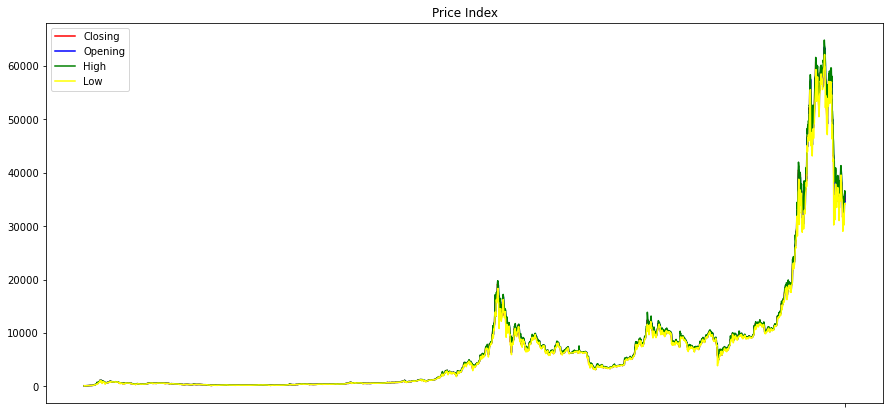

In [9]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(bitcoindata.Date, bitcoindata.Closing, label='Closing', color='red')
plt.plot(bitcoindata.Date, bitcoindata.Opening, label='Opening', color='blue')
plt.plot(bitcoindata.Date, bitcoindata.High, label='High', color='green')
plt.plot(bitcoindata.Date, bitcoindata.Low, label='Low', color='yellow')

plt.xticks('')
plt.legend()

plt.show()

### What does the average price index look like per month? per quarter? per year?

In [10]:
bitcoindata.groupby(['Monthly']).mean()[0:31]

,Closing,Opening,High,Low
Monthly,,,,
201310,151.855872,149.456071,154.576018,144.982100
201311,538.260015,508.211001,560.034675,478.247872
201312,799.382808,810.063822,856.563876,734.056323
201401,859.370984,856.824016,881.562527,829.781661
201402,658.181343,668.739694,690.957171,626.554146
201403,590.488976,593.290589,606.441181,576.165398
201404,458.630058,458.974169,475.581242,441.221584
201405,485.494257,479.571462,492.354471,473.246542
201406,611.740190,611.441551,624.334302,597.900552


In [11]:
bitcoindata.groupby(['Monthly']).mean()[31:62]

,Closing,Opening,High,Low
Monthly,,,,
201605,462.752966,460.206450,466.930192,456.423353
201606,644.864698,639.689931,660.936665,618.724498
201607,660.931127,662.928547,669.312095,651.293345
201608,578.044369,579.606079,585.487379,570.623506
201609,603.792166,602.538041,607.231956,599.398914
201610,641.856733,638.683466,644.883465,635.371531
201611,725.284167,724.112583,732.494792,714.621042
201612,826.246573,819.142621,832.561653,811.624879
201701,912.383306,912.101371,936.381694,881.324718


In [12]:
bitcoindata.groupby(['Monthly']).mean()[62:93]

,Closing,Opening,High,Low
Monthly,,,,
201812,3662.148461,3667.120679,3796.173790,3547.660378
201901,3651.493015,3659.605788,3720.288964,3575.739742
201902,3654.036305,3642.719912,3712.412863,3594.313591
201903,3920.741811,3913.021034,3956.370184,3873.500431
201904,5142.579588,5099.181304,5239.493710,5013.451133
201905,7294.604996,7187.231208,7475.403851,6977.087423
201906,9374.736571,9296.223042,9702.963290,9004.175226
201907,10673.747850,10688.809803,11056.434861,10223.107717
201908,10622.695459,10639.355105,10878.351180,10317.675317


In [13]:
bitcoindata.groupby(['Quarterly']).mean()

,Closing,Opening,High,Low
Quarterly,,,,
2013Q4,496.045647,489.037464,523.330185,452.148122
2014Q1,704.163737,707.536269,727.499064,679.198610
2014Q2,518.257466,516.254801,530.334669,503.783592
2014Q3,531.371494,534.188695,541.214646,523.416657
2014Q4,355.327973,356.096843,364.424239,347.502722
2015Q1,251.028482,251.849607,259.069906,243.898176
2015Q2,236.546946,236.344587,239.374382,233.453050
2015Q3,254.821321,255.088339,258.594095,250.849294
2015Q4,346.937692,344.815886,354.854014,336.296345


In [14]:
bitcoindata.groupby(['Yearly']).mean()

,Closing,Opening,High,Low
Yearly,,,,
2013,496.045647,489.037464,523.330185,452.148122
2014,526.335662,527.571837,539.874378,512.593876
2015,272.548397,272.232906,278.182428,266.335513
2016,567.676750,566.223289,573.977324,558.570542
2017,3986.021947,3951.843611,4132.673853,3782.607896
2018,7503.214471,7531.461472,7751.533619,7274.596378
2019,7362.522656,7350.328884,7541.342292,7150.070741
2020,11124.399764,11064.265675,11329.482235,10809.644357
2021,45858.618656,45843.593855,47418.816540,43946.625009


At a first glance, it looks like there have been <b>five</b> major periods to Bitcoin's price fluctuations:
- The flat period before the first spike.
- The return to normalcy after rampant speculation.
- The recovery after the crash.
- The COVID crash followed by skyrocketing.
- The stratospheric spike after skyrocketing.

Let's look at the flat period.

### What did Bitcoin's price index look like during the flat period?

In [15]:
flatdaterange = bitcoindata.loc[(bitcoindata['Monthly'] <= '201702')]

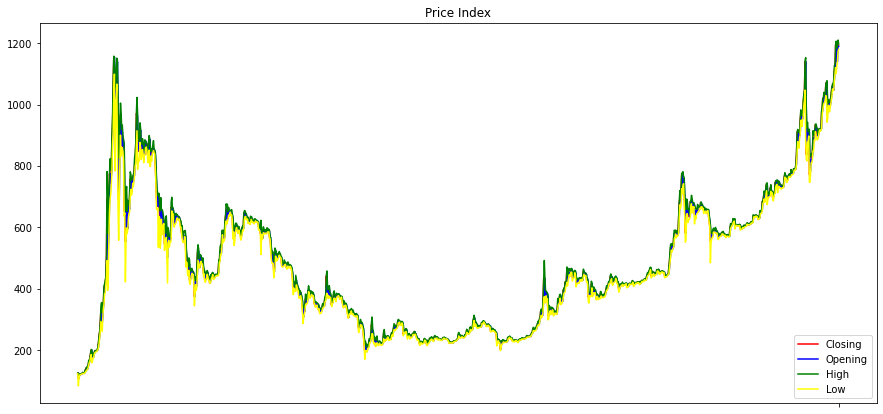

In [16]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(flatdaterange.Date, flatdaterange.Closing, label='Closing', color='red')
plt.plot(flatdaterange.Date, flatdaterange.Opening, label='Opening', color='blue')
plt.plot(flatdaterange.Date, flatdaterange.High, label='High', color='green')
plt.plot(flatdaterange.Date, flatdaterange.Low, label='Low', color='yellow')

plt.xticks('')
plt.legend()

plt.show()

The flat period only had a swing of about $1,000, and that swing largely came from a single person running bots acquiring over 600.000 Bitcoins at the now-defunct Mt. Gox.

https://www.cnbc.com/2018/01/23/one-person-caused-bitcoin-to-spike-from-150-to-1000-in-2013.html

This inflated the price of Bitcoin to over $1,000, and Mt. Gox would later shut down after it was discovered Bitcoins were stolen from the company's wallet as early as 2011.

### When did it finally bottom out?

In [17]:
bottoming = bitcoindata.loc[(bitcoindata['Monthly'] >= '201401') & (bitcoindata['Monthly'] <= '201702')]
bottoming.sort_values(by='Closing', ascending=True).head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
471,BTC,2015-01-14,193.35110,219.12800,219.97300,170.08400,2015,201501,2015Q1
474,BTC,2015-01-17,195.59467,209.16550,209.32420,194.95780,2015,201501,2015Q1
693,BTC,2015-08-24,203.18133,227.23233,227.23233,198.22833,2015,201508,2015Q3
473,BTC,2015-01-16,209.16550,220.57450,222.01380,199.17810,2015,201501,2015Q1
476,BTC,2015-01-19,211.54010,212.27110,216.68050,206.65940,2015,201501,2015Q1
475,BTC,2015-01-18,212.27110,195.59467,218.98480,194.55010,2015,201501,2015Q1
477,BTC,2015-01-20,212.28249,211.54010,214.66619,204.80010,2015,201501,2015Q1
488,BTC,2015-01-31,216.66066,226.94116,233.52791,215.00708,2015,201501,2015Q1
499,BTC,2015-02-11,218.72833,223.00366,223.00924,218.27583,2015,201502,2015Q1
470,BTC,2015-01-13,219.12800,243.08100,249.04299,216.35600,2015,201501,2015Q1


The price of Bitcoin largely bottomed out in <b>January 2015</b>.

### How long did it take for Bitcoin to hit 1,000 dollars again?

In [18]:
bottoming.loc[(bitcoindata['Closing'] > 1000)].head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
1189,BTC,2017-01-01,1009.97375,964.32500,1011.52500,963.53000,2017,201701,2017Q1
1190,BTC,2017-01-02,1028.33375,1009.97375,1034.10500,998.62125,2017,201701,2017Q1
1191,BTC,2017-01-03,1047.09999,1028.33375,1048.12375,1013.37750,2017,201701,2017Q1
1192,BTC,2017-01-04,1140.38500,1047.09999,1141.99750,1047.06375,2017,201701,2017Q1
1221,BTC,2017-02-02,1020.09000,982.82750,1020.12375,982.33375,2017,201702,2017Q1
1222,BTC,2017-02-03,1011.21500,1020.09000,1024.14250,995.87000,2017,201702,2017Q1
1223,BTC,2017-02-04,1029.40124,1011.21500,1040.08625,1004.37750,2017,201702,2017Q1
1224,BTC,2017-02-05,1019.31250,1029.40124,1030.33625,1006.51875,2017,201702,2017Q1
1225,BTC,2017-02-06,1029.40875,1019.31250,1030.40500,1018.23000,2017,201702,2017Q1
1226,BTC,2017-02-07,1067.70875,1029.40875,1067.79625,1029.40875,2017,201702,2017Q1


Bitcoin closed over <span>$</span>1,000 for the first time in two years at the very start of 2017.

### When did Bitcoin start to enter its first spike?

In [19]:
bitcoindata.loc[(bitcoindata['Monthly'] >= '201701') & (bitcoindata['Closing'] > 1300)].head(14)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
1305,BTC,2017-04-27,1335.82500,1289.74750,1343.59250,1289.49250,2017,201704,2017Q2
1306,BTC,2017-04-28,1319.70000,1335.82500,1338.98750,1282.93249,2017,201704,2017Q2
1307,BTC,2017-04-29,1311.58874,1319.70000,1333.37500,1311.25125,2017,201704,2017Q2
1308,BTC,2017-04-30,1370.79000,1311.58874,1371.20625,1308.74250,2017,201704,2017Q2
1309,BTC,2017-05-01,1416.61000,1370.79000,1426.63375,1350.00500,2017,201705,2017Q2
1310,BTC,2017-05-02,1448.88625,1416.61000,1466.88125,1408.54000,2017,201705,2017Q2
1311,BTC,2017-05-03,1506.77250,1448.88625,1507.51000,1431.18125,2017,201705,2017Q2
1312,BTC,2017-05-04,1543.31000,1506.77250,1594.62625,1442.73125,2017,201705,2017Q2
1313,BTC,2017-05-05,1536.15250,1543.31000,1591.96750,1491.67500,2017,201705,2017Q2
1314,BTC,2017-05-06,1554.60250,1536.15250,1555.22500,1517.65000,2017,201705,2017Q2


At the end of <b>April 2017</b>, Bitcoin jumped $400 over the space of two weeks. This would level out before prices spiked again a few months later.

### What was the average monthly price of Bitcoin during those five months?

In [20]:
surge = bitcoindata.loc[(bitcoindata['Monthly'] >= '201701') & (bitcoindata['Monthly'] <= '201705')]
surge.groupby(['Monthly']).mean()

,Closing,Opening,High,Low
Monthly,,,,
201701,912.383306,912.101371,936.381694,881.324718
201702,1065.387660,1057.511017,1077.984768,1038.779687
201703,1127.592546,1131.336224,1164.591546,1093.428354
201704,1221.113624,1211.339190,1231.560965,1198.746114
201705,1903.975442,1870.706571,1963.131626,1803.801975


Price manipulation finally crept up again around <b>May 2015</b> as the previous four months only had incremental growth. <i>The Independent</i> has also reported about the price manipulation:

https://www.independent.co.uk/life-style/gadgets-and-tech/news/bitcoin-price-record-2017-buy-cryptocurrency-whale-a9185451.html

Now let's look at the first spike.

### What did Bitcoin's price index look like from May 2017 to May 2018?

In [21]:
firstspikedaterange = bitcoindata.loc[(bitcoindata['Monthly'] >= '201705') & (bitcoindata['Monthly'] <= '201805')]

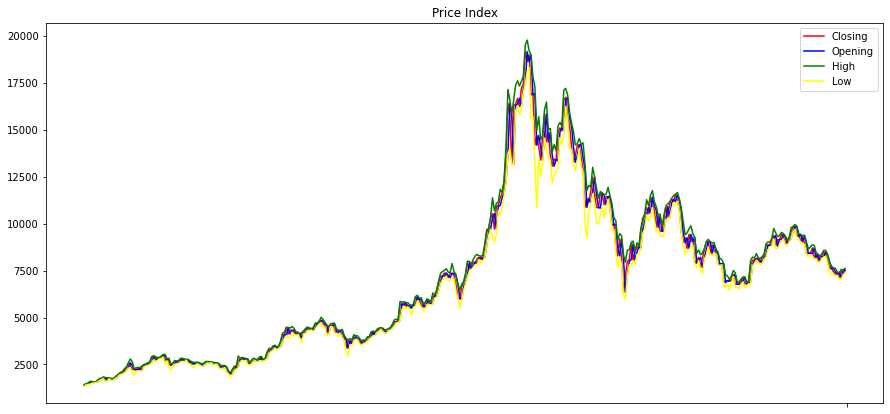

In [22]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(firstspikedaterange.Date, firstspikedaterange.Closing, label='Closing', color='red')
plt.plot(firstspikedaterange.Date, firstspikedaterange.Opening, label='Opening', color='blue')
plt.plot(firstspikedaterange.Date, firstspikedaterange.High, label='High', color='green')
plt.plot(firstspikedaterange.Date, firstspikedaterange.Low, label='Low', color='yellow')

plt.xticks('')
plt.legend()

plt.show()

### When did the first spike peak?

In [23]:
bitcoindata.groupby(['Monthly']).mean()[49:55]

,Closing,Opening,High,Low
Monthly,,,,
201711,7835.135500,7725.749208,8092.623875,7454.319458
201712,14942.157338,14821.727862,15781.762258,13830.786786
201801,12804.021048,12915.927782,13472.895081,12129.863790
201802,9378.356517,9364.723035,9906.351873,8846.966874
201803,8922.208588,9032.697983,9360.843829,8614.268548
201804,8033.288041,7965.854666,8214.074124,7771.380722


<b>December 2017</b> and <b>January 2018</b> were the peak months of the spike.

### How high did it get during those two months?

In [24]:
bitcoindata.loc[(bitcoindata['Monthly'] == '201712') | (bitcoindata['Monthly'] == '201801')].sort_values('High').head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
1584,BTC,2018-01-31,9970.30875,9914.47250,10334.41875,9688.28000,2018,201801,2018Q1
1583,BTC,2018-01-30,9914.47250,10917.15125,11063.80000,9627.88875,2018,201801,2018Q1
1523,BTC,2017-12-01,10923.20125,9706.10375,11082.27000,9421.45624,2017,201712,2017Q4
1524,BTC,2017-12-02,10973.54375,10923.20125,11156.14500,10705.12999,2017,201712,2017Q4
1576,BTC,2018-01-23,10830.92750,10872.90250,11358.33625,9972.28750,2018,201801,2018Q1
1582,BTC,2018-01-29,10917.15125,11412.79375,11480.56375,10805.81625,2018,201801,2018Q1
1579,BTC,2018-01-26,11005.61500,11524.34500,11540.40750,10321.04125,2018,201801,2018Q1
1580,BTC,2018-01-27,11452.23000,11005.61500,11574.36125,10855.46000,2018,201801,2018Q1
1578,BTC,2018-01-25,11524.34500,11629.37500,11629.37500,10889.04500,2018,201801,2018Q1
1526,BTC,2017-12-04,11597.23125,11382.20875,11662.84375,10875.71375,2017,201712,2017Q4


In [25]:
bitcoindata.loc[(bitcoindata['Monthly'] == '201712') | (bitcoindata['Monthly'] == '201801')].sort_values('Closing').head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
1583,BTC,2018-01-30,9914.47250,10917.15125,11063.80000,9627.88875,2018,201801,2018Q1
1584,BTC,2018-01-31,9970.30875,9914.47250,10334.41875,9688.28000,2018,201801,2018Q1
1576,BTC,2018-01-23,10830.92750,10872.90250,11358.33625,9972.28750,2018,201801,2018Q1
1569,BTC,2018-01-16,10870.16875,12915.11625,13211.24625,10063.11750,2018,201801,2018Q1
1575,BTC,2018-01-22,10872.90250,11508.62000,11868.71500,10050.79250,2018,201801,2018Q1
1582,BTC,2018-01-29,10917.15125,11412.79375,11480.56375,10805.81625,2018,201801,2018Q1
1523,BTC,2017-12-01,10923.20125,9706.10375,11082.27000,9421.45624,2017,201712,2017Q4
1524,BTC,2017-12-02,10973.54375,10923.20125,11156.14500,10705.12999,2017,201712,2017Q4
1579,BTC,2018-01-26,11005.61500,11524.34500,11540.40750,10321.04125,2018,201801,2018Q1
1571,BTC,2018-01-18,11137.36875,11340.65000,12045.09500,10663.94500,2018,201801,2018Q1


Bitcoin's daily high was over $10,000. Save the last two days in January, it was also closing just as high.

### Which days were the highest and how high did it go?

In [26]:
bitcoindata.loc[(bitcoindata['Monthly'] == '201712') | (bitcoindata['Monthly'] == '201801')].sort_values('High',ascending=False).head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
1539,BTC,2017-12-17,18640.26250,19166.97874,19783.20625,18094.19374,2017,201712,2017Q4
1538,BTC,2017-12-16,19166.97874,17436.59750,19521.78250,17436.59750,2017,201712,2017Q4
1540,BTC,2017-12-18,18984.76750,18640.26250,19227.08250,18329.14500,2017,201712,2017Q4
1541,BTC,2017-12-19,16862.57125,18984.76750,18984.76750,15577.74250,2017,201712,2017Q4
1537,BTC,2017-12-15,17436.59750,17221.65125,17872.55500,16999.70375,2017,201712,2017Q4
1542,BTC,2017-12-20,16925.01750,16862.57125,17822.56625,15683.86125,2017,201712,2017Q4
1534,BTC,2017-12-12,16678.28749,16374.89750,17615.47250,16259.27750,2017,201712,2017Q4
1536,BTC,2017-12-14,17221.65125,16246.13875,17583.20000,16152.01375,2017,201712,2017Q4
1533,BTC,2017-12-11,16374.89750,16299.29750,17382.63874,16031.44750,2017,201712,2017Q4
1535,BTC,2017-12-13,16246.13875,16678.28749,17335.73125,15799.86750,2017,201712,2017Q4


They were the 16th to the 19th December. At its very peak, Bitcoin almost hit <b>$20,000</b> but quickly fell.

### When did Bitcoin finally close higher than December 2017's peak?

In [27]:
bitcoindata.loc[(bitcoindata['Closing'] > 19783.20625)].head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2634,BTC,2020-12-16,21310.656262,19433.141368,21447.523852,19293.298961,2020,202012,2020Q4
2635,BTC,2020-12-17,22895.976238,21351.254809,23770.846569,21248.365335,2020,202012,2020Q4
2636,BTC,2020-12-18,23008.776257,22819.558896,23261.252880,22357.607647,2020,202012,2020Q4
2637,BTC,2020-12-19,23890.822649,23126.606765,24122.673268,22781.876781,2020,202012,2020Q4
2638,BTC,2020-12-20,23537.369891,23829.284804,24273.041505,23085.954770,2020,202012,2020Q4
2639,BTC,2020-12-21,23177.270998,23476.087500,24081.053094,21960.191348,2020,202012,2020Q4
2640,BTC,2020-12-22,23433.980758,22729.659291,23629.404460,22384.127846,2020,202012,2020Q4
2641,BTC,2020-12-23,23224.454138,23791.565294,24086.950661,22644.561058,2020,202012,2020Q4
2642,BTC,2020-12-24,23623.885533,23228.909087,23737.757149,22716.174167,2020,202012,2020Q4
2643,BTC,2020-12-25,24581.006171,23726.190999,24627.297914,23422.310325,2020,202012,2020Q4


Exactly <b>three</b> years later!

### How did Bitcoin fare in January 2018 after last month's peak?

In [28]:
bitcoindata.loc[(bitcoindata['Monthly'] == '201801')]

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
1554,BTC,2018-01-01,13337.62125,13439.41750,13892.24250,12859.80250,2018,201801,2018Q1
1555,BTC,2018-01-02,14881.54500,13337.62125,15216.75625,12955.96500,2018,201801,2018Q1
1556,BTC,2018-01-03,15104.45000,14881.54500,15394.98625,14588.59500,2018,201801,2018Q1
1557,BTC,2018-01-04,14953.85250,15104.45000,15194.40625,14225.16625,2018,201801,2018Q1
1558,BTC,2018-01-05,16576.69625,14953.85250,17118.35625,14816.50875,2018,201801,2018Q1
1559,BTC,2018-01-06,16735.10625,16576.69625,17211.92375,16254.94875,2018,201801,2018Q1
1560,BTC,2018-01-07,15632.41125,16735.10625,16861.20875,15546.41500,2018,201801,2018Q1
1561,BTC,2018-01-08,15242.93625,15632.41125,15944.52250,13957.91250,2018,201801,2018Q1
1562,BTC,2018-01-09,14122.82500,15242.93625,15360.13250,13968.24375,2018,201801,2018Q1
1563,BTC,2018-01-10,13269.59750,14122.82500,14942.61125,13161.57750,2018,201801,2018Q1


Bitcoin's price would hover above $13,000 for the first half of the month before it started to fall in the second half of the month.

### When did this spike bottom out?

In [29]:
firstspikebottoming = bitcoindata.loc[(bitcoindata['Monthly'] >= '201801') & (bitcoindata['Monthly'] <= '201906')]
firstspikebottoming.sort_values(by='Closing', ascending=True).head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
1902,BTC,2018-12-15,3194.962272,3212.207159,3227.867420,3122.342716,2018,201812,2018Q4
1903,BTC,2018-12-16,3200.642468,3178.299355,3256.600326,3176.353015,2018,201812,2018Q4
1901,BTC,2018-12-14,3212.207081,3262.271683,3300.651394,3138.099494,2018,201812,2018Q4
1900,BTC,2018-12-13,3263.547913,3427.049729,3435.142473,3233.263656,2018,201812,2018Q4
1956,BTC,2019-02-07,3360.534076,3365.529473,3380.783837,3349.755990,2019,201902,2019Q1
1898,BTC,2018-12-11,3360.946628,3409.162882,3428.100418,3294.037452,2018,201812,2018Q4
1955,BTC,2019-02-06,3367.519032,3428.981335,3441.920460,3344.124422,2019,201902,2019Q1
1894,BTC,2018-12-07,3391.874146,3578.207206,3621.501257,3201.762797,2018,201812,2018Q4
1947,BTC,2019-01-29,3395.018645,3429.707749,3438.068371,3346.143188,2019,201901,2019Q1
1952,BTC,2019-02-03,3404.499313,3433.044895,3487.571973,3386.579366,2019,201902,2019Q1


It looks like the first spike finally bottomed out a year after it hits its peak in <b>December 2018</b>.

### Did Bitcoin quickly or slowly bottom out at the end of 2018?

In [30]:
latterhalf2018 = bitcoindata.loc[(bitcoindata['Monthly'] >= '201805') & (bitcoindata['Monthly'] <= '201812')]

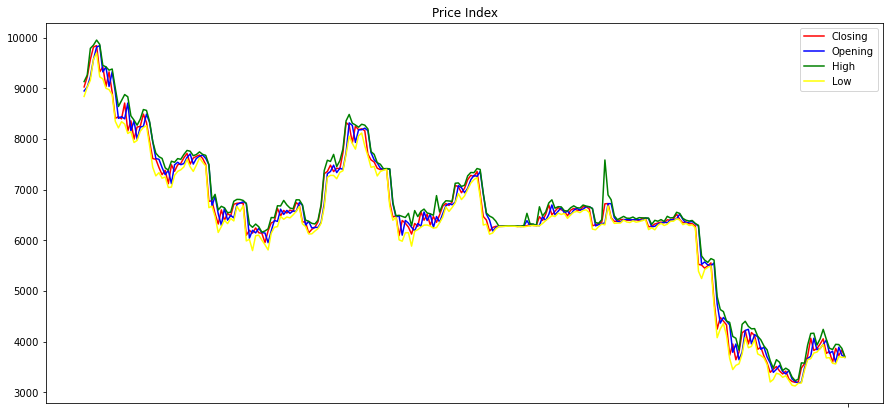

In [31]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(latterhalf2018.Date, latterhalf2018.Closing, label='Closing', color='red')
plt.plot(latterhalf2018.Date, latterhalf2018.Opening, label='Opening', color='blue')
plt.plot(latterhalf2018.Date, latterhalf2018.High, label='High', color='green')
plt.plot(latterhalf2018.Date, latterhalf2018.Low, label='Low', color='yellow')

plt.xticks('')
plt.legend()

plt.show()

It looked like it was largely around $6,000 except for a small jump before quickly tumbling at the end of the year.

### When did that small jump happen?

In [32]:
bitcoindata.loc[(bitcoindata['Monthly'] >= '201806') & (bitcoindata['Monthly'] <= '201809') & (bitcoindata['Closing'] >= 8000)]

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
1758,BTC,2018-07-24,8325.801534,7730.248177,8359.319474,7695.982837,2018,201807,2018Q3
1759,BTC,2018-07-25,8271.597920,8320.159947,8486.011680,8056.018565,2018,201807,2018Q3
1761,BTC,2018-07-27,8254.277348,7933.125251,8277.703662,7801.009443,2018,201807,2018Q3
1762,BTC,2018-07-28,8184.695535,8182.375003,8233.482102,8063.326116,2018,201807,2018Q3
1763,BTC,2018-07-29,8201.890090,8184.696086,8292.515658,8119.713310,2018,201807,2018Q3
1764,BTC,2018-07-30,8166.388360,8215.215969,8274.533757,7862.074283,2018,201807,2018Q3


At the end of <b>July 2018</b>.

### When did Bitcoin start to crash again?

In [33]:
bitcoindata.loc[(bitcoindata['Monthly'] >= '201810') & (bitcoindata['Monthly'] <= '201812') & (bitcoindata['Closing'] < 6000)].head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
1871,BTC,2018-11-14,5524.801093,6281.604411,6295.953866,5390.116630,2018,201811,2018Q4
1872,BTC,2018-11-15,5511.152834,5524.764809,5692.068952,5244.694267,2018,201811,2018Q4
1873,BTC,2018-11-16,5448.600634,5573.017153,5608.722588,5423.050404,2018,201811,2018Q4
1874,BTC,2018-11-17,5497.411279,5513.423860,5564.028968,5466.500590,2018,201811,2018Q4
1875,BTC,2018-11-18,5553.014895,5497.367784,5638.976973,5495.677822,2018,201811,2018Q4
1876,BTC,2018-11-19,4800.342897,5553.014747,5610.149551,4708.864255,2018,201811,2018Q4
1877,BTC,2018-11-20,4246.312774,4744.619841,4888.622712,4076.594717,2018,201811,2018Q4
1878,BTC,2018-11-21,4478.299558,4364.741549,4631.902485,4250.165063,2018,201811,2018Q4
1879,BTC,2018-11-22,4405.744031,4476.227244,4591.879115,4354.568649,2018,201811,2018Q4
1880,BTC,2018-11-23,4329.917220,4405.744487,4405.744585,4119.999691,2018,201811,2018Q4


Starting at the middle of <b>November 2018</b>.

### How long would this bottoming last?

In [34]:
bitcoindata.loc[(bitcoindata['Monthly'] >= '201812') & (bitcoindata['Closing'] <= 4000)]

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
1890,BTC,2018-12-03,3847.032737,4092.851115,4104.858957,3755.326092,2018,201812,2018Q4
1891,BTC,2018-12-04,3889.292120,3847.020460,4034.531558,3724.003343,2018,201812,2018Q4
1892,BTC,2018-12-05,3713.573383,3889.292261,3913.531776,3675.541484,2018,201812,2018Q4
1893,BTC,2018-12-06,3578.206624,3696.351467,3838.120977,3547.013939,2018,201812,2018Q4
1894,BTC,2018-12-07,3391.874146,3578.207206,3621.501257,3201.762797,2018,201812,2018Q4
...,...,...,...,...,...,...,...,...,...
1999,BTC,2019-03-22,3987.305225,3974.811248,4002.532316,3957.944316,2019,201903,2019Q1
2000,BTC,2019-03-23,3977.707443,3977.276039,4006.984568,3961.802425,2019,201903,2019Q1
2001,BTC,2019-03-24,3968.438701,3977.707443,3990.965292,3940.879744,2019,201903,2019Q1
2002,BTC,2019-03-25,3913.781717,3972.696582,3982.232764,3903.293930,2019,201903,2019Q1


This bottoming would continue on for another three months or so.

### When did the recovery start?

In [35]:
bitcoindata.loc[((bitcoindata['Monthly'] == '201904') | (bitcoindata['Monthly'] == '201905')) & (bitcoindata['Closing'] > 6000)]

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2047,BTC,2019-05-09,6159.685902,5932.446285,6159.685902,5845.650918,2019,201905,2019Q2
2048,BTC,2019-05-10,6387.829450,6159.689544,6426.831207,6098.157976,2019,201905,2019Q2
2049,BTC,2019-05-11,7254.805536,6347.706737,7337.322181,6346.331889,2019,201905,2019Q2
2050,BTC,2019-05-12,6992.706661,7241.023653,7577.770675,6758.882084,2019,201905,2019Q2
2051,BTC,2019-05-13,7906.940835,6992.705887,8148.561088,6860.286680,2019,201905,2019Q2
2052,BTC,2019-05-14,7928.417416,7906.946425,8353.869652,7642.403561,2019,201905,2019Q2
2053,BTC,2019-05-15,8177.453519,7989.127708,8260.953110,7844.980238,2019,201905,2019Q2
2054,BTC,2019-05-16,7820.076243,8177.453574,8360.300191,7683.665283,2019,201905,2019Q2
2055,BTC,2019-05-17,7243.650539,7820.076541,7935.974770,6900.829403,2019,201905,2019Q2
2056,BTC,2019-05-18,7295.649729,7361.257633,7490.794200,7218.260668,2019,201905,2019Q2


Bitcoin started recovering <b>May 2019</b>.

### Which months did the recovery peak?

In [36]:
bitcoindata.groupby(['Monthly']).mean()[67:75]

,Closing,Opening,High,Low
Monthly,,,,
201905,7294.604996,7187.231208,7475.403851,6977.087423
201906,9374.736571,9296.223042,9702.963290,9004.175226
201907,10673.747850,10688.809803,11056.434861,10223.107717
201908,10622.695459,10639.355105,10878.351180,10317.675317
201909,9794.481489,9834.303614,9980.864954,9542.205445
201910,8384.904782,8351.380934,8602.897706,8176.202739
201911,8338.880314,8388.345744,8523.630427,8152.222369
201912,7241.728666,7248.734004,7382.311483,7107.441941


From <b>June</b> to <b>September 2019</b>. Bitcoin would hit as high as $11,000 before crashing back down again.

### How high did the price of Bitcoin get from June to September 2019?

In [37]:
recoverypeak = bitcoindata.loc[(bitcoindata['Monthly'] >= '201906') & (bitcoindata['Monthly'] <= '201908')]
recoverypeak.sort_values(by='High', ascending=False).head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2095,BTC,2019-06-26,12444.925860,11668.665857,13879.237706,11625.881090,2019,201906,2019Q2
2096,BTC,2019-06-27,11086.268829,12444.922343,13328.580313,10314.753873,2019,201906,2019Q2
2109,BTC,2019-07-10,12054.183793,12585.241974,13175.687737,11566.898394,2019,201907,2019Q3
2108,BTC,2019-07-09,12575.904067,12335.991553,12815.679036,12127.712182,2019,201907,2019Q3
2097,BTC,2019-06-28,12316.953012,11086.235715,12402.043512,10789.984140,2019,201906,2019Q2
2098,BTC,2019-06-29,12024.080972,12360.187098,12381.041702,11368.274496,2019,201906,2019Q2
2107,BTC,2019-07-08,12335.999395,11422.141159,12354.463032,11335.163950,2019,201907,2019Q3
2136,BTC,2019-08-06,11310.187224,11811.803563,12314.107665,11219.403783,2019,201908,2019Q3
2110,BTC,2019-07-11,11324.144697,12054.182806,12188.177843,11011.041120,2019,201907,2019Q3
2099,BTC,2019-06-30,10932.310507,12024.094522,12187.306699,10837.560065,2019,201906,2019Q2


<b>$13879.237706</b>

It was during <b>late June</b> to <b>early July</b> when the recovery peaked and almost reached $14,000. What was the reason behind this? It was partly Facebook announcing their own cryptocurrency <i>Libra</i>, partly regulators taking a more keen look into cryptocurrency lending legitimacy, and partly due to the weakening of the dollar.

https://www.cnn.com/2019/06/26/business/bitcoin-value-trnd/index.html

Following this peak, Bitcoin remained relatively stable above $7,000 before crashing. Again.

### How long did this stability last?

In [38]:
stability = bitcoindata.loc[(bitcoindata['Monthly'] >= '201910') & (bitcoindata['Monthly'] <= '202003')]

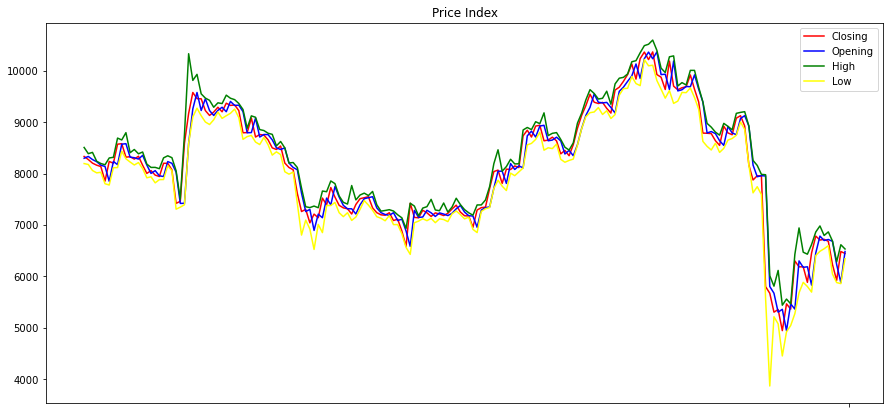

In [39]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(stability.Date, stability.Closing, label='Closing', color='red')
plt.plot(stability.Date, stability.Opening, label='Opening', color='blue')
plt.plot(stability.Date, stability.High, label='High', color='green')
plt.plot(stability.Date, stability.Low, label='Low', color='yellow')

plt.xticks('')
plt.legend()

plt.show()

<b>Six months</b>! There were two mini-jumps before COVID made it crash in <b>March 2020</b>.

### When was the first mini-jump?

In [40]:
bitcoindata.loc[((bitcoindata['Monthly'] >= '201910') & (bitcoindata['Monthly'] <= '201912')) & (bitcoindata['Closing'] > 9000)]

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2217,BTC,2019-10-26,9171.306532,8591.236577,10332.409507,8591.225768,2019,201910,2019Q4
2218,BTC,2019-10-27,9578.367556,9259.521873,9813.443885,9103.737134,2019,201910,2019Q4
2219,BTC,2019-10-28,9458.223360,9578.364387,9930.974021,9272.656652,2019,201910,2019Q4
2220,BTC,2019-10-29,9455.724693,9228.074502,9551.778726,9125.778457,2019,201910,2019Q4
2221,BTC,2019-10-30,9225.995479,9455.728198,9468.963245,9004.132304,2019,201910,2019Q4
2222,BTC,2019-10-31,9131.410630,9225.997769,9425.449940,8954.899640,2019,201910,2019Q4
2223,BTC,2019-11-01,9197.632345,9131.417153,9291.117644,9047.176594,2019,201911,2019Q4
2224,BTC,2019-11-02,9290.896602,9230.478858,9377.084522,9197.833142,2019,201911,2019Q4
2225,BTC,2019-11-03,9202.415451,9290.899794,9362.633137,9074.382879,2019,201911,2019Q4
2226,BTC,2019-11-04,9369.628081,9203.826007,9526.165195,9125.861531,2019,201911,2019Q4


From <b>late October</b> to <b>early November</b>.

### When was the second mini-jump?

In [41]:
bitcoindata.loc[((bitcoindata['Monthly'] >= '201912') & (bitcoindata['Monthly'] <= '202002')) & (bitcoindata['Closing'] > 9000)]

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2311,BTC,2020-01-28,9131.114988,8877.733617,9176.388648,8874.284819,2020,202001,2020Q1
2312,BTC,2020-01-29,9320.978406,9131.114653,9432.677487,9104.824063,2020,202001,2020Q1
2313,BTC,2020-01-30,9545.077957,9288.522646,9633.251035,9185.181340,2020,202001,2020Q1
2314,BTC,2020-01-31,9388.880752,9548.545376,9558.432613,9198.659041,2020,202001,2020Q1
2315,BTC,2020-02-01,9363.193383,9388.879070,9451.064580,9284.410559,2020,202002,2020Q1
2316,BTC,2020-02-02,9385.260386,9375.226831,9465.487907,9150.534573,2020,202002,2020Q1
2317,BTC,2020-02-03,9269.707035,9385.259769,9603.105582,9222.946494,2020,202002,2020Q1
2318,BTC,2020-02-04,9177.894637,9286.207776,9349.247058,9072.588214,2020,202002,2020Q1
2319,BTC,2020-02-05,9625.456637,9177.895794,9745.171377,9147.652281,2020,202002,2020Q1
2320,BTC,2020-02-06,9681.377411,9600.403585,9856.447773,9527.151669,2020,202002,2020Q1


From <b>late January</b> to <b>late February</b>. There were also five days where Bitcoin closed above $10,000.

### What did the Bitcoin price index look like during the COVID crash?

In [42]:
covid = bitcoindata.loc[(bitcoindata['Monthly'] == '202003')]

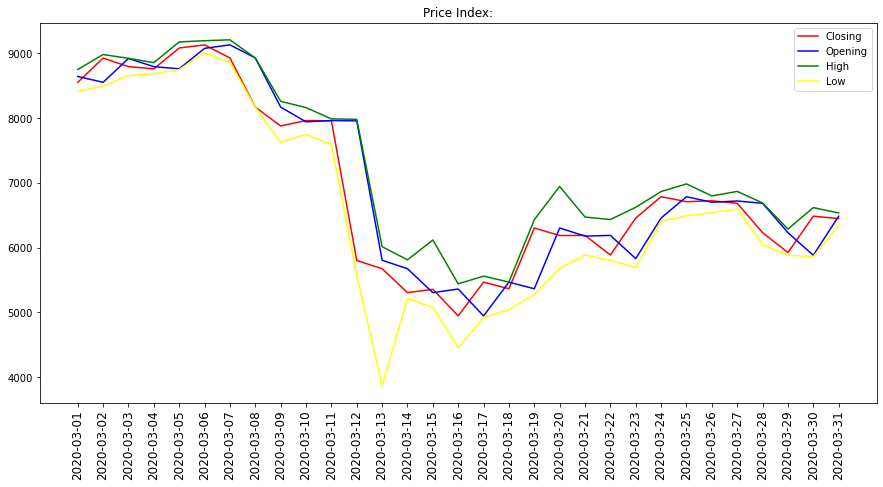

In [43]:
plt.figure(figsize=(15,7))

plt.title('Price Index:')
plt.plot(covid.Date, covid.Closing, label='Closing', color='red')
plt.plot(covid.Date, covid.Opening, label='Opening', color='blue')
plt.plot(covid.Date, covid.High, label='High', color='green')
plt.plot(covid.Date, covid.Low, label='Low', color='yellow')

plt.xticks(covid.Date, rotation='vertical', size=12)
plt.legend()

plt.show()

In [44]:
covid

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2344,BTC,2020-03-01,8548.948322,8639.592081,8747.725718,8412.723329,2020,202003,2020Q1
2345,BTC,2020-03-02,8923.044398,8549.045999,8977.333203,8491.456295,2020,202003,2020Q1
2346,BTC,2020-03-03,8791.112058,8916.739890,8919.263748,8652.809024,2020,202003,2020Q1
2347,BTC,2020-03-04,8756.961062,8791.112073,8852.256660,8682.684594,2020,202003,2020Q1
2348,BTC,2020-03-05,9078.578777,8756.962116,9172.138258,8745.992956,2020,202003,2020Q1
2349,BTC,2020-03-06,9126.636822,9073.160134,9191.150340,9004.944712,2020,202003,2020Q1
2350,BTC,2020-03-07,8925.213488,9126.888318,9204.672359,8858.647557,2020,202003,2020Q1
2351,BTC,2020-03-08,8166.313894,8925.217518,8925.383039,8163.682472,2020,202003,2020Q1
2352,BTC,2020-03-09,7875.750875,8166.313268,8256.125507,7625.189619,2020,202003,2020Q1
2353,BTC,2020-03-10,7959.228274,7939.252823,8159.157919,7745.152079,2020,202003,2020Q1


The price started to dip after Black Monday (9th March) and bottomed out at <b>$3867.091312</b> on Black Friday (13th March). Recovery quickly returned, and it wouldn't take long for Bitcoin to recover its pre-COVID value.

### What did Bitcoin's price index look like post-COVID crash?

In [45]:
postcovidcrash = bitcoindata.loc[(bitcoindata['Monthly'] == '202004')]

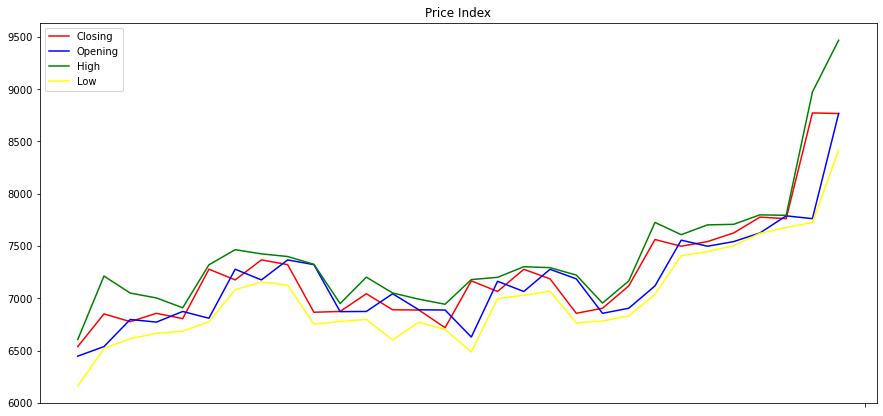

In [46]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(postcovidcrash.Date, postcovidcrash.Closing, label='Closing', color='red')
plt.plot(postcovidcrash.Date, postcovidcrash.Opening, label='Opening', color='blue')
plt.plot(postcovidcrash.Date, postcovidcrash.High, label='High', color='green')
plt.plot(postcovidcrash.Date, postcovidcrash.Low, label='Low', color='yellow')

plt.xticks('')
plt.legend()

plt.show()

Bitcoin hovered around $7,000 for the majority of the month before it started climbing again at the end of the month.

### How long did it take for Bitcoin to return to its pre-COVID value?

In [47]:
bitcoindata.loc[(bitcoindata['Monthly'] >= '202004') & (bitcoindata['Closing'] >= 9000)].head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2410,BTC,2020-05-06,9371.684273,9032.183227,9392.635447,8927.777068,2020,202005,2020Q2
2411,BTC,2020-05-07,9900.678867,9371.679970,9958.733998,9065.921045,2020,202005,2020Q2
2412,BTC,2020-05-08,9917.248414,9903.830754,10062.715915,9732.806548,2020,202005,2020Q2
2413,BTC,2020-05-09,9617.518195,9917.253174,9957.110928,9546.040993,2020,202005,2020Q2
2417,BTC,2020-05-13,9330.986485,8823.780831,9416.590183,8802.916560,2020,202005,2020Q2
2418,BTC,2020-05-14,9757.296586,9330.985268,9940.956082,9273.416587,2020,202005,2020Q2
2419,BTC,2020-05-15,9362.635557,9795.282556,9848.185361,9155.515351,2020,202005,2020Q2
2420,BTC,2020-05-16,9418.918551,9362.636646,9583.062439,9219.362205,2020,202005,2020Q2
2421,BTC,2020-05-17,9684.701959,9418.913715,9879.712040,9327.763833,2020,202005,2020Q2
2422,BTC,2020-05-18,9723.680150,9673.836632,9933.976225,9523.848992,2020,202005,2020Q2


Almost <b>two</b> months.

By 6th May, Bitcoin regained its February and pre-COVID value. In less than a month, it would return to $10,000 again.

### How long did it take for 10,000 dollars to be the norm again?

In [48]:
bitcoindata.loc[(bitcoindata['Monthly'] >= '202006') & (bitcoindata['Closing'] >= 10000)].head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2436,BTC,2020-06-01,10268.581985,9427.232535,10357.789166,9417.354212,2020,202006,2020Q2
2492,BTC,2020-07-27,11187.779727,9940.111573,11394.848754,9930.839960,2020,202007,2020Q3
2493,BTC,2020-07-28,10939.670142,11040.790471,11254.551345,10580.128596,2020,202007,2020Q3
2494,BTC,2020-07-29,11284.458987,10930.452776,11318.087099,10852.880968,2020,202007,2020Q3
2495,BTC,2020-07-30,11118.918412,11118.888584,11180.430635,10847.200845,2020,202007,2020Q3
2496,BTC,2020-07-31,11373.317257,11112.421158,11467.950588,10980.823915,2020,202007,2020Q3
2497,BTC,2020-08-01,11766.748297,11352.715036,11880.773635,11241.976773,2020,202008,2020Q3
2498,BTC,2020-08-02,11139.098380,11820.512913,12117.677084,10658.946078,2020,202008,2020Q3
2499,BTC,2020-08-03,11261.806332,11071.267108,11480.283382,10956.562911,2020,202008,2020Q3
2500,BTC,2020-08-04,11228.026324,11237.224514,11400.064190,11045.968418,2020,202008,2020Q3


<b>Two months</b>!

27th July marked the beginning of Bitcoin surging past $10,000. This would continue for a bit longer before another jump.

### What did the price index look like during the post-COVID recovery?

In [49]:
postcovidrecovery = bitcoindata.loc[(bitcoindata['Monthly'] >= '202005') & (bitcoindata['Monthly'] <= '202007')]

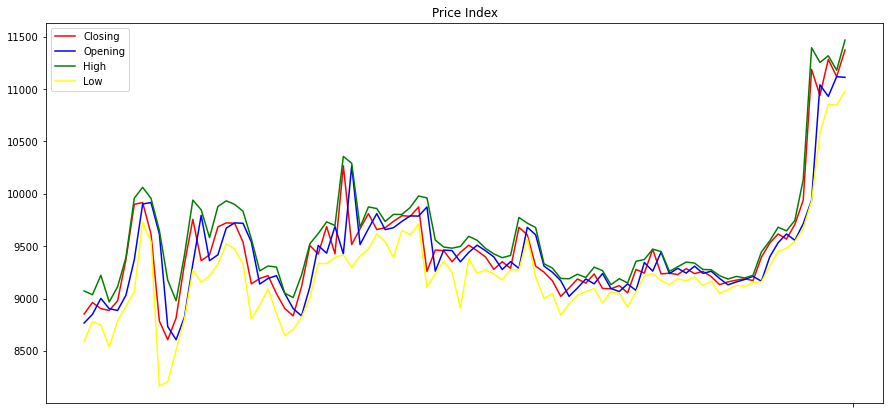

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(postcovidrecovery.Date, postcovidrecovery.Closing, label='Closing', color='red')
plt.plot(postcovidrecovery.Date, postcovidrecovery.Opening, label='Opening', color='blue')
plt.plot(postcovidrecovery.Date, postcovidrecovery.High, label='High', color='green')
plt.plot(postcovidrecovery.Date, postcovidrecovery.Low, label='Low', color='yellow')

plt.xticks('')
plt.legend()

plt.show()

Bitcoin hovered around $9,500 before jumping again <b>late July</b>.

### How long did it take for Bitcoin to reach 20,000 dollars?

In [51]:
bitcoindata.loc[(bitcoindata['Monthly'] >= '202008') & (bitcoindata['Closing'] >= 20000)].head(16)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2634,BTC,2020-12-16,21310.656262,19433.141368,21447.523852,19293.298961,2020,202012,2020Q4
2635,BTC,2020-12-17,22895.976238,21351.254809,23770.846569,21248.365335,2020,202012,2020Q4
2636,BTC,2020-12-18,23008.776257,22819.558896,23261.252880,22357.607647,2020,202012,2020Q4
2637,BTC,2020-12-19,23890.822649,23126.606765,24122.673268,22781.876781,2020,202012,2020Q4
2638,BTC,2020-12-20,23537.369891,23829.284804,24273.041505,23085.954770,2020,202012,2020Q4
2639,BTC,2020-12-21,23177.270998,23476.087500,24081.053094,21960.191348,2020,202012,2020Q4
2640,BTC,2020-12-22,23433.980758,22729.659291,23629.404460,22384.127846,2020,202012,2020Q4
2641,BTC,2020-12-23,23224.454138,23791.565294,24086.950661,22644.561058,2020,202012,2020Q4
2642,BTC,2020-12-24,23623.885533,23228.909087,23737.757149,22716.174167,2020,202012,2020Q4
2643,BTC,2020-12-25,24581.006171,23726.190999,24627.297914,23422.310325,2020,202012,2020Q4


Nearly <b>five months</b>!

From late July to mid December, the price of Bitcoin was consistently over $11,000. On 16th December, exactly <b>three</b> years after almost reaching that milestone, Bitcoin finally did it.

### What did the price index look like on its way to 20,000 dollars?

In [52]:
towards20000 = bitcoindata.loc[(bitcoindata['Monthly'] >= '202008') & (bitcoindata['Monthly'] <= '202012')]

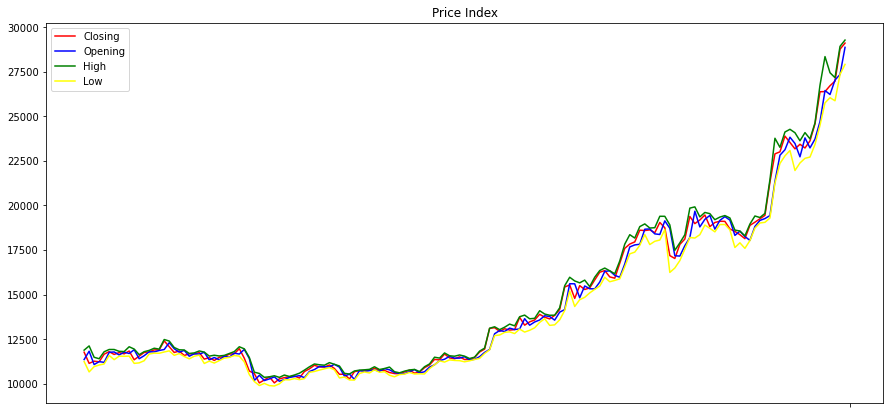

In [53]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(towards20000.Date, towards20000.Closing, label='Closing', color='red')
plt.plot(towards20000.Date, towards20000.Opening, label='Opening', color='blue')
plt.plot(towards20000.Date, towards20000.High, label='High', color='green')
plt.plot(towards20000.Date, towards20000.Low, label='Low', color='yellow')

plt.xticks('')
plt.legend()

plt.show()

Bitcoin remained relatively stable around $11,000 until that spike happened.

### When did the price of Bitcoin spike again?

In [54]:
bitcoindata.loc[(bitcoindata['Monthly'] == '202011')]

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2589,BTC,2020-11-01,13730.197311,13810.641981,13907.312951,13641.540336,2020,202011,2020Q4
2590,BTC,2020-11-02,13633.698217,13768.956765,13837.851182,13270.207337,2020,202011,2020Q4
2591,BTC,2020-11-03,13832.938410,13565.130676,13842.474544,13301.611951,2020,202011,2020Q4
2592,BTC,2020-11-04,14163.976816,14014.734882,14257.529707,13582.402202,2020,202011,2020Q4
2593,BTC,2020-11-05,15424.527677,14156.608637,15494.578175,14104.902089,2020,202011,2020Q4
2594,BTC,2020-11-06,15540.596591,15607.505497,15971.641416,15202.764507,2020,202011,2020Q4
2595,BTC,2020-11-07,14783.981679,15603.258540,15764.104700,14330.681832,2020,202011,2020Q4
2596,BTC,2020-11-08,15500.334255,14820.436468,15657.129042,14711.548192,2020,202011,2020Q4
2597,BTC,2020-11-09,15283.780139,15481.906077,15810.773786,14845.791762,2020,202011,2020Q4
2598,BTC,2020-11-10,15374.044386,15327.588389,15448.412754,15092.389798,2020,202011,2020Q4


<b>November 2020</b>.

In the space of a month, Bitcoin closed nearly $6,000 higher. Why? Europe entered her second lockdown, the dollar continued to weaken, and the stock markets were rallying on the back of the U.S presidential election.

https://www.forbes.com/sites/cbovaird/2020/11/05/bitcoin-surpasses-15000-to-reach-fresh-2020-high/

After the election, the price index started to climb. When president-elect Joe Biden was declared the winner, the price index skyrocketed.

### What did the price index look like in 2021?

In [55]:
bitcoin2021 = bitcoindata.loc[(bitcoindata['Monthly'] >= '202101')]

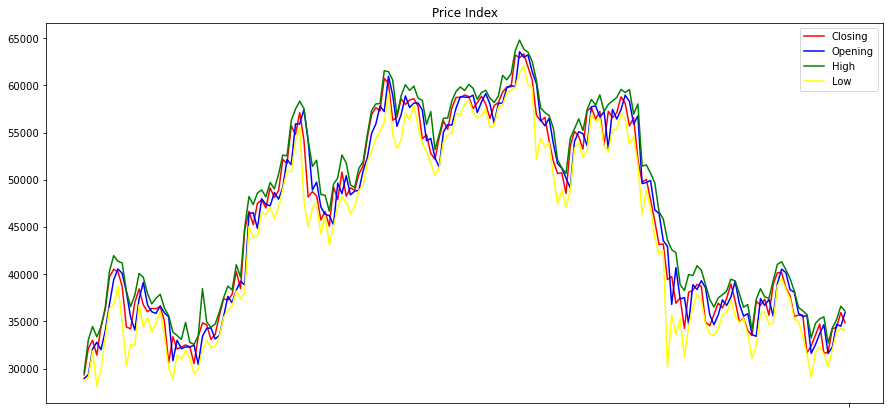

In [56]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(bitcoin2021.Date, bitcoin2021.Closing, label='Closing', color='red')
plt.plot(bitcoin2021.Date, bitcoin2021.Opening, label='Opening', color='blue')
plt.plot(bitcoin2021.Date, bitcoin2021.High, label='High', color='green')
plt.plot(bitcoin2021.Date, bitcoin2021.Low, label='Low', color='yellow')

plt.xticks('')
plt.legend()

plt.show()

It almost went as high as $65,000, and then it crashed back down again.

### When did the price of Bitcoin go into a frenzy?

In [57]:
frenzy2021 = bitcoindata.loc[(bitcoindata['Monthly'] >= '202101') & (bitcoindata['Closing'] > 45000)]
frenzy2021

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2689,BTC,2021-02-09,46674.851688,46433.489636,48226.250888,45058.068995,2021,202102,2021Q1
2690,BTC,2021-02-10,45237.475689,46512.990563,47374.355909,43886.276038,2021,202102,2021Q1
2691,BTC,2021-02-11,47500.897524,44859.847672,48600.631935,44070.727065,2021,202102,2021Q1
2692,BTC,2021-02-12,47884.182862,47992.622909,48925.534482,46550.147951,2021,202102,2021Q1
2693,BTC,2021-02-13,47005.190649,47405.557154,48189.777990,46333.573660,2021,202102,2021Q1
...,...,...,...,...,...,...,...,...,...
2781,BTC,2021-05-12,52147.821187,56767.711063,58036.509777,51625.547849,2021,202105,2021Q2
2782,BTC,2021-05-13,49764.132082,49596.778891,51448.798576,46294.720180,2021,202105,2021Q2
2783,BTC,2021-05-14,50032.693137,49717.354353,51578.312545,48944.346536,2021,202105,2021Q2
2784,BTC,2021-05-15,47885.625255,49926.035067,50690.802950,47005.102292,2021,202105,2021Q2


From early February to the mid May. Once the price started to climb above $45,000, it maintained that level for over <b>three</b> months.

### What did the price index look like during the 2021 frenzy?

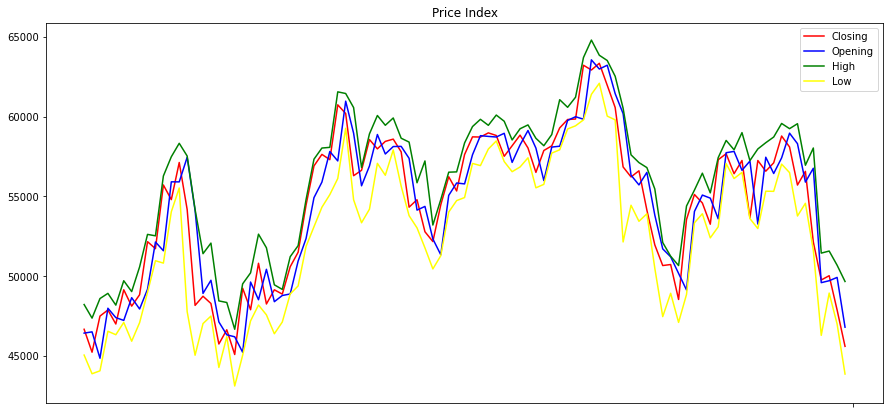

In [58]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(frenzy2021.Date, frenzy2021.Closing, label='Closing', color='red')
plt.plot(frenzy2021.Date, frenzy2021.Opening, label='Opening', color='blue')
plt.plot(frenzy2021.Date, frenzy2021.High, label='High', color='green')
plt.plot(frenzy2021.Date, frenzy2021.Low, label='Low', color='yellow')

plt.xticks('')
plt.legend()

plt.show()

The frenzy actually had four different mini-peaks. All four spikes closed above $55,000.

### When did Bitcoin reach 30,000 dollars?

In [59]:
bitcoindata.loc[(bitcoindata['Monthly'] >= '202101') & (bitcoindata['Closing'] > 30000)].head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2651,BTC,2021-01-02,32154.167363,29353.640608,33064.673534,29012.927887,2021,202101,2021Q1
2652,BTC,2021-01-03,33002.536427,32074.106611,34452.080337,31885.581619,2021,202101,2021Q1
2653,BTC,2021-01-04,31431.612280,32788.583453,33358.399346,28154.110298,2021,202101,2021Q1
2654,BTC,2021-01-05,34433.606514,31991.926865,34435.417475,29948.653628,2021,202101,2021Q1
2655,BTC,2021-01-06,36275.756348,34001.344764,36461.691774,33351.028120,2021,202101,2021Q1
2656,BTC,2021-01-07,39713.507857,36806.419755,40324.014033,36356.430756,2021,202101,2021Q1
2657,BTC,2021-01-08,40519.448598,39420.800696,41962.362125,36741.330177,2021,202101,2021Q1
2658,BTC,2021-01-09,40258.923989,40558.102123,41375.430681,38766.276161,2021,202101,2021Q1
2659,BTC,2021-01-10,38709.765375,40096.333202,41186.523430,34897.550466,2021,202101,2021Q1
2660,BTC,2021-01-11,34409.642375,38132.535794,38204.754410,30305.300045,2021,202101,2021Q1


Right when the new year started.

### When did Bitcoin reach 40,000 dollars?

In [60]:
bitcoindata.loc[(bitcoindata['Monthly'] >= '202101') & (bitcoindata['Closing'] > 40000)].head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2657,BTC,2021-01-08,40519.448598,39420.800696,41962.362125,36741.330177,2021,202101,2021Q1
2658,BTC,2021-01-09,40258.923989,40558.102123,41375.430681,38766.276161,2021,202101,2021Q1
2686,BTC,2021-02-06,40302.799793,38305.275390,40999.046843,38233.726668,2021,202102,2021Q1
2688,BTC,2021-02-08,44716.685469,38853.299454,44981.859999,38036.283249,2021,202102,2021Q1
2689,BTC,2021-02-09,46674.851688,46433.489636,48226.250888,45058.068995,2021,202102,2021Q1
2690,BTC,2021-02-10,45237.475689,46512.990563,47374.355909,43886.276038,2021,202102,2021Q1
2691,BTC,2021-02-11,47500.897524,44859.847672,48600.631935,44070.727065,2021,202102,2021Q1
2692,BTC,2021-02-12,47884.182862,47992.622909,48925.534482,46550.147951,2021,202102,2021Q1
2693,BTC,2021-02-13,47005.190649,47405.557154,48189.777990,46333.573660,2021,202102,2021Q1
2694,BTC,2021-02-14,49151.167576,47231.133340,49716.436379,47105.171745,2021,202102,2021Q1


The next month, although two days in January did hit that mark.

### When did Bitcoin reach 50,000 dollars?

In [61]:
bitcoindata.loc[(bitcoindata['Monthly'] >= '202101') & (bitcoindata['Closing'] > 50000)].head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2697,BTC,2021-02-17,52165.302555,49186.333867,52621.835066,48990.895191,2021,202102,2021Q1
2698,BTC,2021-02-18,51728.508797,52146.003385,52532.297117,50971.743176,2021,202102,2021Q1
2699,BTC,2021-02-19,55719.204362,51598.143714,56283.549841,50821.472820,2021,202102,2021Q1
2700,BTC,2021-02-20,54801.648644,55917.039183,57487.028305,54039.673924,2021,202102,2021Q1
2701,BTC,2021-02-21,57128.642606,55913.351445,58332.364616,55531.550703,2021,202102,2021Q1
2702,BTC,2021-02-22,54181.914649,57453.358009,57535.863482,47780.749583,2021,202102,2021Q1
2711,BTC,2021-03-03,50811.855174,48526.990362,52636.222988,48195.123104,2021,202103,2021Q1
2715,BTC,2021-03-07,50594.698575,48887.566413,51222.872300,48887.566413,2021,202103,2021Q1
2716,BTC,2021-03-08,51503.258132,50948.880707,51916.413946,49390.182715,2021,202103,2021Q1
2717,BTC,2021-03-09,54458.037811,52360.748163,54804.078453,51865.590033,2021,202103,2021Q1


February as well! It lasted for a week and returned in March.

### When did Bitcoin reach 60,000 dollars?

In [62]:
bitcoindata.loc[(bitcoindata['Monthly'] >= '202104') & (bitcoindata['Closing'] > 60000)].head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2752,BTC,2021-04-13,63223.884391,59841.561373,63707.342359,59799.440578,2021,202104,2021Q2
2753,BTC,2021-04-14,62926.557176,63562.673545,64801.787870,61400.283968,2021,202104,2021Q2
2754,BTC,2021-04-15,63346.789035,62987.270179,63850.250735,62094.632914,2021,202104,2021Q2
2755,BTC,2021-04-16,61965.782598,63225.093917,63520.325374,60033.534667,2021,202104,2021Q2
2756,BTC,2021-04-17,60574.444728,61444.232503,62534.028498,59802.889267,2021,202104,2021Q2


April! Bitcoin crossed $60,000 for a total of <b>five days</b>, and it quickly fell afterwards.

### What did April 2021's price index look like?

In [63]:
bitcoindata.loc[(bitcoindata['Monthly'] == '202104')]

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2740,BTC,2021-04-01,58984.612930,58764.433092,59458.984563,57973.352098,2021,202104,2021Q2
2741,BTC,2021-04-02,58821.626994,58726.084566,60101.752326,58478.598349,2021,202104,2021Q2
2742,BTC,2021-04-03,57517.798773,58958.428985,59713.210136,57185.768006,2021,202104,2021Q2
2743,BTC,2021-04-04,58177.402764,57134.860051,58540.984706,56552.222275,2021,202104,2021Q2
2744,BTC,2021-04-05,58843.559540,58230.675538,59243.036175,56846.969047,2021,202104,2021Q2
2745,BTC,2021-04-06,58040.187602,59133.655740,59484.199475,57421.853085,2021,202104,2021Q2
2746,BTC,2021-04-07,56508.942864,58030.621849,58645.772971,55541.906134,2021,202104,2021Q2
2747,BTC,2021-04-08,57880.905684,55996.080360,58179.656864,55758.491178,2021,202104,2021Q2
2748,BTC,2021-04-09,58171.909019,58094.744128,58880.821608,57717.859778,2021,202104,2021Q2
2749,BTC,2021-04-10,59295.950044,58149.650591,61065.222625,57924.075264,2021,202104,2021Q2


With the exception of a single day, Bitcoin closed above $50,000 for the entirety of the month. Why was that? Large institutional investors and firms, such as <b>Tesla</b>, <b>Mastercard</b>, <b>PayPal</b>, and <b>BNY Mellon</b>, acquired and adopted the use of cryptocurrencies.

https://www.cnbc.com/2021/03/13/bitcoin-surpasses-60000-in-record-high-as-rally-accelerates-.html

### What did May 2021's price index look like?

In [64]:
bitcoindata.loc[(bitcoindata['Monthly'] == '202105')]

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2770,BTC,2021-05-01,57677.975222,57741.020910,58511.256049,57062.700071,2021,202105,2021Q2
2771,BTC,2021-05-02,56427.043125,57824.300187,57925.741567,56123.039508,2021,202105,2021Q2
2772,BTC,2021-05-03,57255.306838,56639.439786,59001.359642,56508.240449,2021,202105,2021Q2
2773,BTC,2021-05-04,53658.843121,57218.805329,57246.891191,53613.595218,2021,202105,2021Q2
2774,BTC,2021-05-05,57252.702185,53270.229118,57977.613423,52987.158660,2021,202105,2021Q2
2775,BTC,2021-05-06,56583.849879,57459.052175,58368.682092,55330.727863,2021,202105,2021Q2
2776,BTC,2021-05-07,57107.120672,56439.133399,58724.110778,55320.958118,2021,202105,2021Q2
2777,BTC,2021-05-08,58788.209679,57419.147888,59575.463115,57028.498049,2021,202105,2021Q2
2778,BTC,2021-05-09,58102.191426,58966.915010,59249.141676,56494.915334,2021,202105,2021Q2
2779,BTC,2021-05-10,55715.546651,58308.318048,59560.025459,53774.628243,2021,202105,2021Q2


Bitcoin started to crash after the middle of the month due to a combination of:
- Elon Musk raising environmental concerns about the nature of Bitcoin mining
- China banning Bitcoin miners

Compared to the start of the month, Bitcoin lost $20,000 by the end of it.

https://www.msn.com/en-us/money/news/why-musks-bitcoin-u-turn-caused-a-crypto-crash/ar-BB1gHVTG
https://www.cnn.com/2021/05/24/investing/bitcoin-mining-china-crackdown-intl-hnk/index.html

### What did June 2021's price index look like?

In [65]:
bitcoindata.loc[(bitcoindata['Monthly'] == '202106')]

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly
2801,BTC,2021-06-01,36419.749501,37271.391219,37818.478193,35715.744996,2021,202106,2021Q2
2802,BTC,2021-06-02,37422.571455,36686.469466,38214.792458,35936.282827,2021,202106,2021Q2
2803,BTC,2021-06-03,38958.492780,37578.336532,39473.297430,37209.198521,2021,202106,2021Q2
2804,BTC,2021-06-04,37190.101351,39247.495157,39287.312949,35593.792566,2021,202106,2021Q2
2805,BTC,2021-06-05,34981.380693,36879.606079,37956.264433,34873.638103,2021,202106,2021Q2
2806,BTC,2021-06-06,35335.679199,35560.481834,36492.447063,35281.563178,2021,202106,2021Q2
2807,BTC,2021-06-07,34016.565341,35817.512796,36782.087938,33629.664017,2021,202106,2021Q2
2808,BTC,2021-06-08,33504.256613,33597.686727,34080.420465,31035.494575,2021,202106,2021Q2
2809,BTC,2021-06-09,37127.189720,33412.716822,37332.451444,32437.091458,2021,202106,2021Q2
2810,BTC,2021-06-10,36715.047103,37403.603972,38461.250740,35827.506176,2021,202106,2021Q2


Bitcoin's value stabilised around $35,000 at closing.

### How many days did Bitcoin close above certain price levels?

In [66]:
bitcoindata.loc[(bitcoindata['Closing'] > 10000)].count()[0]

503

In [67]:
bitcoindata.loc[(bitcoindata['Closing'] > 20000)].count()[0]

197

In [68]:
bitcoindata.loc[(bitcoindata['Closing'] > 30000)].count()[0]

180

In [69]:
bitcoindata.loc[(bitcoindata['Closing'] > 40000)].count()[0]

105

In [70]:
bitcoindata.loc[(bitcoindata['Closing'] > 50000)].count()[0]

74

In [71]:
bitcoindata.loc[(bitcoindata['Closing'] > 60000)].count()[0]

7

### What did the price index look like during the 'COVID Year'?

In [72]:
bitcoincovid = bitcoindata.loc[(bitcoindata['Date'] >= '2020-03-13') & (bitcoindata['Date'] <= '2021-03-12')]

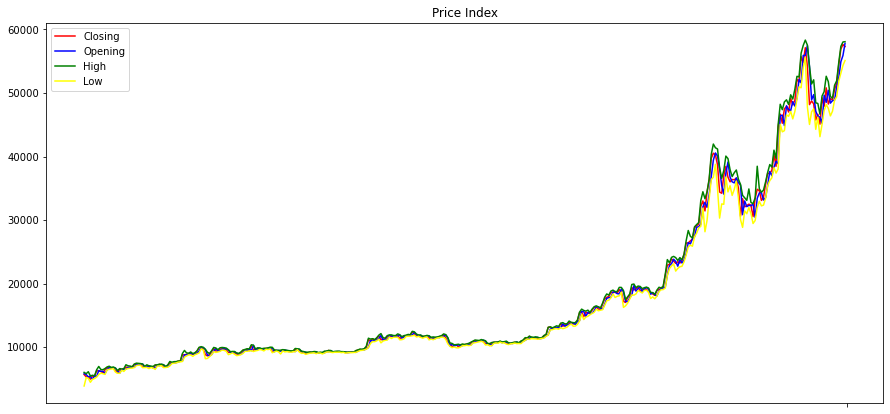

In [73]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(bitcoincovid.Date, bitcoincovid.Closing, label='Closing', color='red')
plt.plot(bitcoincovid.Date, bitcoincovid.Opening, label='Opening', color='blue')
plt.plot(bitcoincovid.Date, bitcoincovid.High, label='High', color='green')
plt.plot(bitcoincovid.Date, bitcoincovid.Low, label='Low', color='yellow')

plt.xticks('')
plt.legend()

plt.show()

### What does the volatility price index look like?

We are defining <i>volatility</i> as the difference between the highs and lows, and we are adding another column in our data frame that quantifies <i>volatility</i>.

In [74]:
bitcoindata['Volatility'] = bitcoindata['High'] - bitcoindata['Low']
bitcoindata

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly,Volatility
1,BTC,2013-10-01,125.455000,123.654990,125.758500,123.633830,2013,201310,2013Q4,2.124670
2,BTC,2013-10-02,108.584830,125.455000,125.665660,83.328330,2013,201310,2013Q4,42.337330
3,BTC,2013-10-03,118.674660,108.584830,118.675000,107.058160,2013,201310,2013Q4,11.616840
4,BTC,2013-10-04,121.338660,118.674660,121.936330,118.005660,2013,201310,2013Q4,3.930670
5,BTC,2013-10-05,120.655330,121.338660,121.852160,120.554500,2013,201310,2013Q4,1.297660
...,...,...,...,...,...,...,...,...,...,...
2826,BTC,2021-06-26,31739.290211,31599.061431,32706.070569,30190.733553,2021,202106,2021Q2,2515.337016
2827,BTC,2021-06-27,34213.012738,32290.253772,34313.410224,32006.611849,2021,202106,2021Q2,2306.798376
2828,BTC,2021-06-28,34365.185783,34698.863389,35188.436188,33911.951437,2021,202106,2021Q2,1276.484751
2829,BTC,2021-06-29,35945.786857,34488.518245,36609.362895,34240.012468,2021,202106,2021Q2,2369.350427


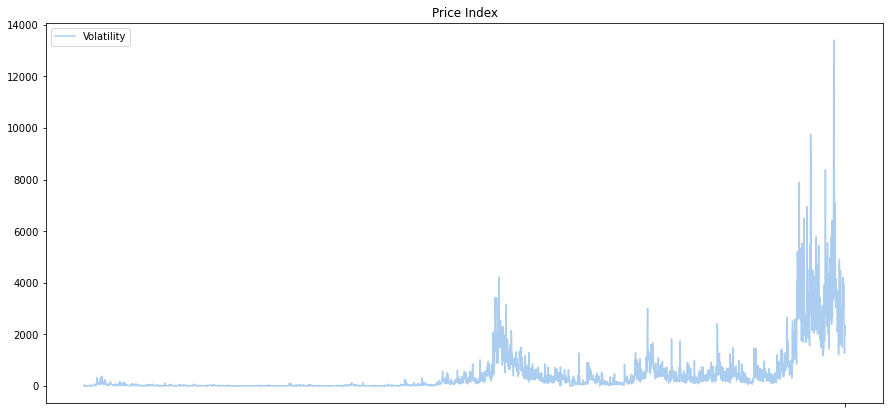

In [75]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(bitcoindata.Date, bitcoindata.Volatility, label='Volatility', color='#abcdef')

plt.xticks('')
plt.legend()

plt.show()

The flat era was truly flat as it showed the volatility to be very minimal. Subsequent peaks were indicators of price distortions in the market, especially the speculative demands from investors and firms during COVID.

### What were the top ten days where the volatility was the highest?

In [76]:
bitcoindata.sort_values('Volatility',ascending=False).head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly,Volatility
2788,BTC,2021-05-19,39439.237635,42920.748859,43604.569586,30201.957317,2021,202105,2021Q2,13402.612269
2702,BTC,2021-02-22,54181.914649,57453.358009,57535.863482,47780.749583,2021,202102,2021Q1,9755.113899
2703,BTC,2021-02-23,48172.877477,54124.539094,54180.232179,45047.782858,2021,202102,2021Q1,9132.449322
2790,BTC,2021-05-21,36921.767808,40685.325138,42278.005178,33594.958899,2021,202105,2021Q2,8683.046279
2757,BTC,2021-04-18,56850.830166,60191.525406,60531.988848,52148.983544,2021,202104,2021Q2,8383.005304
2660,BTC,2021-01-11,34409.642375,38132.535794,38204.754410,30305.300045,2021,202101,2021Q1,7899.454365
2792,BTC,2021-05-23,34259.548416,37521.890770,38267.299279,31179.690362,2021,202105,2021Q2,7087.608917
2688,BTC,2021-02-08,44716.685469,38853.299454,44981.859999,38036.283249,2021,202102,2021Q1,6945.576749
2789,BTC,2021-05-20,39756.089849,36795.422984,42589.863965,35670.948379,2021,202105,2021Q2,6918.915585
2678,BTC,2021-01-29,34842.557393,33424.595591,38468.078290,31984.008916,2021,202101,2021Q1,6484.069373


Every single date came within 2021, and <b>19th May</b> took the top spot with a difference of $13,402.612269!

### What were the top ten days where the volatility was the lowest?

In [77]:
bitcoindata.sort_values('Volatility',ascending=True).head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly,Volatility
1918,BTC,2018-12-31,3689.56462,3689.972338,3690.306792,3689.47512,2018,201812,2018Q4,0.831672
619,BTC,2015-06-11,229.90820,229.959900,230.386400,229.32230,2015,201506,2015Q2,1.064100
734,BTC,2015-10-04,238.82433,238.998830,239.501750,238.24375,2015,201510,2015Q4,1.258000
5,BTC,2013-10-05,120.65533,121.338660,121.852160,120.55450,2013,201310,2013Q4,1.297660
605,BTC,2015-05-28,237.22770,237.670800,237.896000,236.53590,2015,201505,2015Q2,1.360100
915,BTC,2016-04-02,418.93999,418.785000,419.830000,418.46700,2016,201604,2016Q2,1.363000
6,BTC,2013-10-06,121.79500,120.655330,121.991660,120.43199,2013,201310,2013Q4,1.559670
720,BTC,2015-09-20,230.75433,231.337330,232.078410,230.51408,2015,201509,2015Q3,1.564330
12,BTC,2013-10-12,126.38333,125.927500,126.896500,125.27650,2013,201310,2013Q4,1.620000
726,BTC,2015-09-26,234.32908,234.924660,234.989500,233.18125,2015,201509,2015Q3,1.808250


The dates are scattered throughout the years, but <b>31st December 2018</b> took the top spot with a difference of only $0.831672!

### What did volatility look like on a monthly basis?

In [78]:
monthlymaxvolatility = bitcoindata.groupby(['Monthly']).max()['Volatility']
monthlyminvolatility = bitcoindata.groupby(['Monthly']).min()['Volatility']
monthlyavgvolatility = bitcoindata.groupby(['Monthly']).mean()['Volatility']

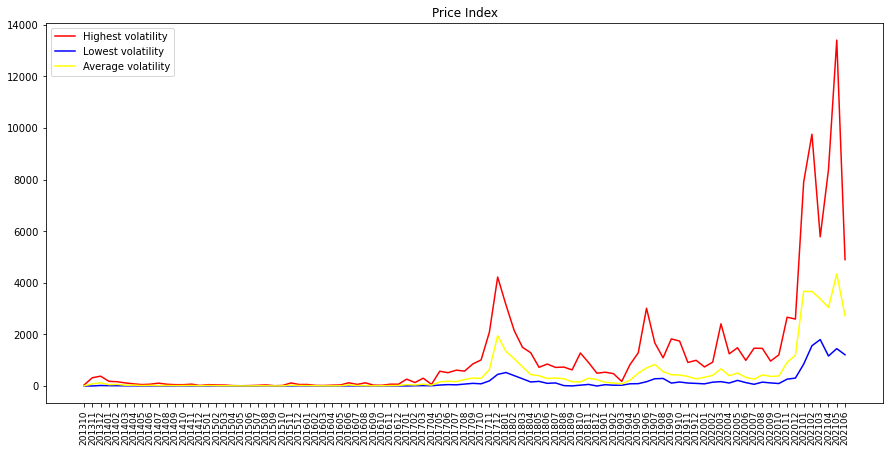

In [79]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(monthlymaxvolatility, label='Highest volatility', color='red')
plt.plot(monthlyminvolatility, label='Lowest volatility', color='blue')
plt.plot(monthlyavgvolatility, label='Average volatility', color='yellow')

plt.xticks(rotation='vertical', size=9)
plt.legend()

plt.show()

### What did volatility look like on a quarterly basis?

In [80]:
quarterlymaxvolatility = bitcoindata.groupby(['Quarterly']).max()['Volatility']
quarterlyminvolatility = bitcoindata.groupby(['Quarterly']).min()['Volatility']
quarterlyavgvolatility = bitcoindata.groupby(['Quarterly']).mean()['Volatility']

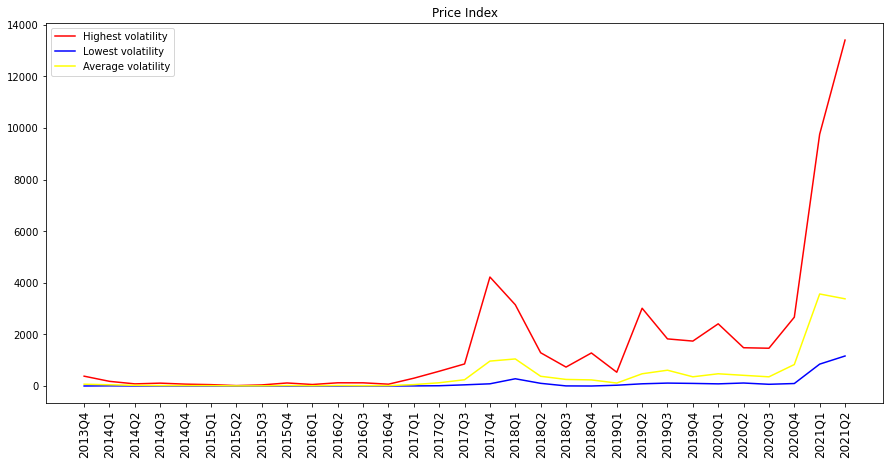

In [81]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(quarterlymaxvolatility, label='Highest volatility', color='red')
plt.plot(quarterlyminvolatility, label='Lowest volatility', color='blue')
plt.plot(quarterlyavgvolatility, label='Average volatility', color='yellow')

plt.xticks(rotation='vertical', size=12)
plt.legend()

plt.show()

### What did volatility look like on a yearly basis?

In [82]:
yearlymaxvolatility = bitcoindata.groupby(['Yearly']).max()['Volatility']
yearlyminvolatility = bitcoindata.groupby(['Yearly']).min()['Volatility']
yearlyavgvolatility = bitcoindata.groupby(['Yearly']).mean()['Volatility']

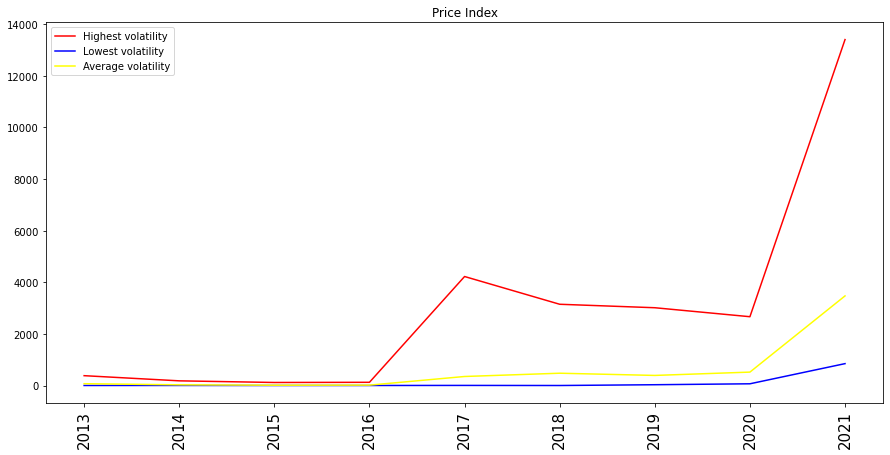

In [83]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(yearlymaxvolatility, label='Highest volatility', color='red')
plt.plot(yearlyminvolatility, label='Lowest volatility', color='blue')
plt.plot(yearlyavgvolatility, label='Average volatility', color='yellow')

plt.xticks(rotation='vertical', size=15)
plt.legend()

plt.show()

### For how many days was the volatility over 1,000 dollars?

In [84]:
bitcoindata.loc[(bitcoindata['Volatility'] > 1000)].count()[0]

315

### For how many days was the volatility over 5,000 dollars?

In [85]:
bitcoindata.loc[(bitcoindata['Volatility'] > 5000)].count()[0]

27

### For how many days was the volatility over 10,000 dollars?

In [86]:
bitcoindata.loc[(bitcoindata['Volatility'] > 10000)].count()[0]

1

### What does the profit price index look like?

We are defining <i>profit</i> as the difference in price between when it opened and when it closed, and we are adding another column in our data frame that quantifies <i>profit</i>.

In [87]:
bitcoindata['Profit'] = bitcoindata['Closing'] - bitcoindata['Opening']
bitcoindata

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly,Volatility,Profit
1,BTC,2013-10-01,125.455000,123.654990,125.758500,123.633830,2013,201310,2013Q4,2.124670,1.800010
2,BTC,2013-10-02,108.584830,125.455000,125.665660,83.328330,2013,201310,2013Q4,42.337330,-16.870170
3,BTC,2013-10-03,118.674660,108.584830,118.675000,107.058160,2013,201310,2013Q4,11.616840,10.089830
4,BTC,2013-10-04,121.338660,118.674660,121.936330,118.005660,2013,201310,2013Q4,3.930670,2.664000
5,BTC,2013-10-05,120.655330,121.338660,121.852160,120.554500,2013,201310,2013Q4,1.297660,-0.683330
...,...,...,...,...,...,...,...,...,...,...,...
2826,BTC,2021-06-26,31739.290211,31599.061431,32706.070569,30190.733553,2021,202106,2021Q2,2515.337016,140.228779
2827,BTC,2021-06-27,34213.012738,32290.253772,34313.410224,32006.611849,2021,202106,2021Q2,2306.798376,1922.758965
2828,BTC,2021-06-28,34365.185783,34698.863389,35188.436188,33911.951437,2021,202106,2021Q2,1276.484751,-333.677606
2829,BTC,2021-06-29,35945.786857,34488.518245,36609.362895,34240.012468,2021,202106,2021Q2,2369.350427,1457.268612


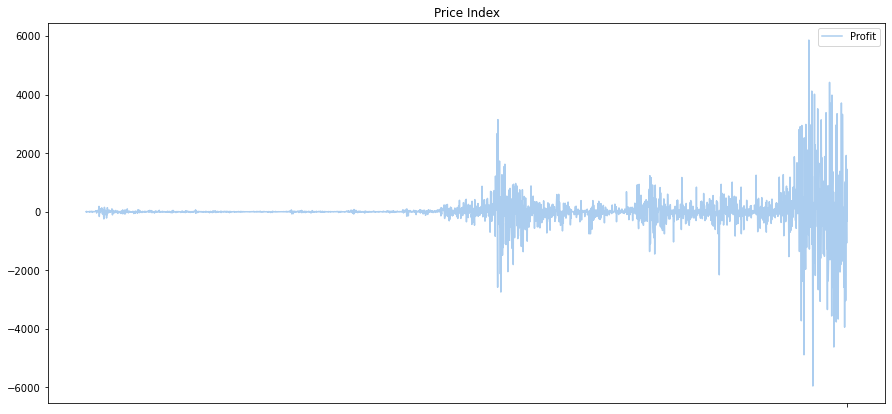

In [88]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(bitcoindata.Date, bitcoindata.Profit, label='Profit', color='#abcdef')

plt.xticks('')
plt.legend()

plt.show()

Not surprisingly, the massive gains and losses are inherently tied to Bitcoin's spikes. The biggest gains and losses have all came within 2020 or 2021.

### What were the top ten days where the profit was the highest?

In [89]:
bitcoindata.sort_values('Profit',ascending=False).head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly,Volatility,Profit
2688,BTC,2021-02-08,44716.685469,38853.299454,44981.859999,38036.283249,2021,202102,2021Q1,6945.576749,5863.386015
2765,BTC,2021-04-26,53558.707845,49139.230955,54398.592788,48854.581374,2021,202104,2021Q2,5544.011415,4419.476890
2699,BTC,2021-02-19,55719.204362,51598.143714,56283.549841,50821.472820,2021,202102,2021Q1,5462.077021,4121.060647
2709,BTC,2021-03-01,49248.914013,45234.368757,49520.724994,45044.383764,2021,202103,2021Q1,4476.341229,4014.545256
2774,BTC,2021-05-05,57252.702185,53270.229118,57977.613423,52987.158660,2021,202105,2021Q2,4990.454763,3982.473066
2809,BTC,2021-06-09,37127.189720,33412.716822,37332.451444,32437.091458,2021,202106,2021Q2,4895.359986,3714.472898
2769,BTC,2021-04-30,57302.646424,53598.879503,57434.933127,53097.762794,2021,202104,2021Q2,4337.170333,3703.766922
2721,BTC,2021-03-13,60743.041825,57227.233450,61556.594492,56124.149994,2021,202103,2021Q1,5432.444498,3515.808375
2752,BTC,2021-04-13,63223.884391,59841.561373,63707.342359,59799.440578,2021,202104,2021Q2,3907.901781,3382.323018
2793,BTC,2021-05-24,38085.789361,34737.628018,39966.876470,34485.431042,2021,202105,2021Q2,5481.445429,3348.161342


Every single date came within 2021, and <b>8th February</b> took the top spot with a profit of $5,863.386015!

### What were the top ten days where the profit was the lowest?

In [90]:
bitcoindata.sort_values('Profit',ascending=True).head(10)

,Currency,Date,Closing,Opening,High,Low,Yearly,Monthly,Quarterly,Volatility,Profit
2703,BTC,2021-02-23,48172.877477,54124.539094,54180.232179,45047.782858,2021,202102,2021Q1,9132.449322,-5951.661617
2670,BTC,2021-01-21,30606.182676,35491.423921,35612.737198,30077.278955,2021,202101,2021Q1,5535.458243,-4885.241245
2781,BTC,2021-05-12,52147.821187,56767.711063,58036.509777,51625.547849,2021,202105,2021Q2,6410.961928,-4619.889876
2821,BTC,2021-06-21,31659.541730,35602.053017,35736.708113,31531.906561,2021,202106,2021Q2,4204.801552,-3942.511287
2790,BTC,2021-05-21,36921.767808,40685.325138,42278.005178,33594.958899,2021,202105,2021Q2,8683.046279,-3763.557330
2660,BTC,2021-01-11,34409.642375,38132.535794,38204.754410,30305.300045,2021,202101,2021Q1,7899.454365,-3722.893419
2797,BTC,2021-05-28,34898.008720,38562.138317,38899.165402,34741.958068,2021,202105,2021Q2,4157.207334,-3664.129598
2773,BTC,2021-05-04,53658.843121,57218.805329,57246.891191,53613.595218,2021,202105,2021Q2,3633.295974,-3559.962209
2788,BTC,2021-05-19,39439.237635,42920.748859,43604.569586,30201.957317,2021,202105,2021Q2,13402.612269,-3481.511224
2757,BTC,2021-04-18,56850.830166,60191.525406,60531.988848,52148.983544,2021,202104,2021Q2,8383.005304,-3340.695240


Every single date also came within 2021, and <b>23rd February</b> took the top spot with a difference of -$5951.661617!

### What did profit look like on a monthly basis? quarterly basis? yearly basis?

In [91]:
monthlymaxprofit = bitcoindata.groupby(['Monthly']).max()['Profit']
monthlyminprofit = bitcoindata.groupby(['Monthly']).min()['Profit']
monthlyavgprofit = bitcoindata.groupby(['Monthly']).mean()['Profit']

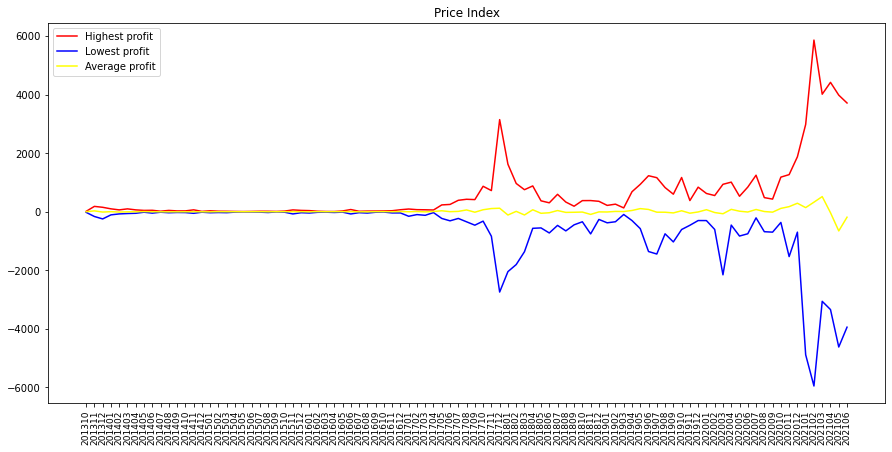

In [92]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(monthlymaxprofit, label='Highest profit', color='red')
plt.plot(monthlyminprofit, label='Lowest profit', color='blue')
plt.plot(monthlyavgprofit, label='Average profit', color='yellow')

plt.xticks(rotation='vertical', size=9)
plt.legend()

plt.show()

### What did profit look like on a quarterly basis?

In [93]:
quarterlymaxprofit = bitcoindata.groupby(['Quarterly']).max()['Profit']
quarterlyminprofit = bitcoindata.groupby(['Quarterly']).min()['Profit']
quarterlyavgprofit = bitcoindata.groupby(['Quarterly']).mean()['Profit']

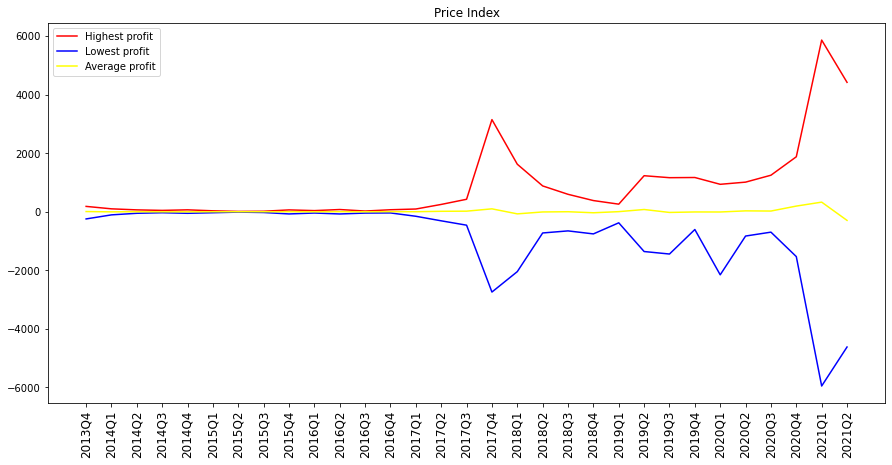

In [94]:
plt.figure(figsize=(15,7))

plt.title('Price Index')
plt.plot(quarterlymaxprofit, label='Highest profit', color='red')
plt.plot(quarterlyminprofit, label='Lowest profit', color='blue')
plt.plot(quarterlyavgprofit, label='Average profit', color='yellow')

plt.xticks(rotation='vertical', size=12)
plt.legend()

plt.show()

### What did profit look like on a yearly basis?

In [95]:
yearlymaxprofit = bitcoindata.groupby(['Yearly']).max()['Profit']
yearlyminprofit = bitcoindata.groupby(['Yearly']).min()['Profit']
yearlyavgprofit = bitcoindata.groupby(['Yearly']).mean()['Profit']

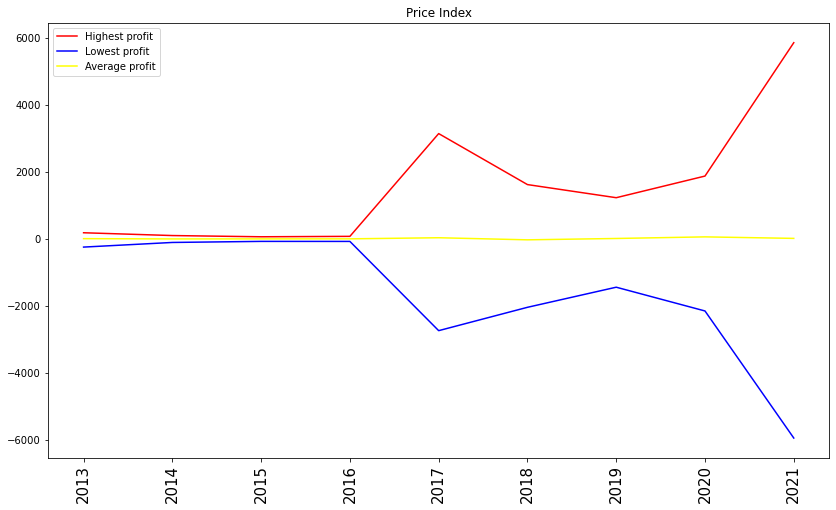

In [96]:
plt.figure(figsize=(14,8))

plt.title('Price Index')
plt.plot(yearlymaxprofit, label='Highest profit', color='red')
plt.plot(yearlyminprofit, label='Lowest profit', color='blue')
plt.plot(yearlyavgprofit, label='Average profit', color='yellow')

plt.xticks(rotation='vertical', size=15)
plt.legend()

plt.show()

### For how many days was the profit positive and negative?

In [97]:
print(f"{bitcoindata.loc[(bitcoindata['Profit'] >= 0)].count()[0]} days net positive.")
print(f"{bitcoindata.loc[(bitcoindata['Profit'] < 0)].count()[0]} days net negative.")

1508 days net positive.
1322 days net negative.


### For how many months was the profit positive and negative?

In [98]:
print(f"{bitcoindata.groupby(['Monthly']).mean().loc[(bitcoindata.groupby(['Monthly']).mean()['Profit'] >= 0)].count()[0]} months net positive.")
print(f"{bitcoindata.groupby(['Monthly']).mean().loc[(bitcoindata.groupby(['Monthly']).mean()['Profit'] < 0)].count()[0]} months net negative.")

51 months net positive.
42 months net negative.


### For how many quarters was the profit positive and negative?

In [99]:
print(f"{bitcoindata.groupby(['Quarterly']).mean().loc[(bitcoindata.groupby(['Quarterly']).mean()['Profit'] >= 0)].count()[0]} quarters net positive.")
print(f"{bitcoindata.groupby(['Quarterly']).mean().loc[(bitcoindata.groupby(['Quarterly']).mean()['Profit'] < 0)].count()[0]} quarters net negative.")

17 quarters net positive.
14 quarters net negative.


### For how many years was the profit positive and negative?

In [100]:
print(f"{bitcoindata.groupby(['Yearly']).mean().loc[(bitcoindata.groupby(['Yearly']).mean()['Profit'] >= 0)].count()[0]} years net positive.")
print(f"{bitcoindata.groupby(['Yearly']).mean().loc[(bitcoindata.groupby(['Yearly']).mean()['Profit'] < 0)].count()[0]} years net negative.")

7 years net positive.
2 years net negative.


## Credits
Special thanks to <br>
https://www.coindesk.com/price/bitcoin <br>
for the pricing data. <br>

Last retrieved: 1st July, 2021.